<a href="https://colab.research.google.com/github/tommyclint/project_DataAnalyst/blob/main/Customer_Segmentation_Analysis_Tommy_Sitompul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business background
Imagine yourself as a new data analyst for an Indonesian investment platform startup currently focused on app-based mutual fund investment at the end of September 2021. In the mobile app developed by the company, users can register as investors and conduct buy or sell transactions on selected mutual funds. In addition, the platform offers robo-investing, which allows users to invest in a diversified mutual fund portfolio without hassle while considering the factors such as age, income, and overall risk profile.


#Objective

In the second week of October, the company is set to expand into government bond investment products, in addition to its existing mutual fund products. The marketing and sales team would like to run a thematic communication campaign for the upcoming product but want to tailor the campaign to a few different relevant segments. As a data analyst, **you’re tasked to provide segmentation for this purpose and give communication recommendations for the themes of the campaign.**


#**Dictionary**


###Users.csv


*   user_id                       :Client ID on the platform

*   registration_import_datetime	:Registration time and date at UTC+7 timezone (WIB)

*   user_gender	                  :User self-identified gender
*   user_age	                    :User self-identified age


*   user_occupation	              :User self-identified job


*   user_income_range	            :User self-identified income range



*   referral_code_used	          :If user enter referral code during
registration, the value is "used referral"; else will be Null valued

*   user_income_source	          :User self-declared source of income


###Daily_User_Balance.csv


*   user_id	: Client ID on the platform
*   date: Date of the user balance
*   Saham_AUM : AUM of equity mutual fund held by client to date
*   Saham_invested_amount	The total price paid by client to buy equity mutual fund to date.
*   Saham_transaction_amount:	Total value of transaction to buy (if positive) or sell (if negative) equity mutual fund on the date. If there's no transaction, the value should be 0 or NA
*   Pasar_Uang_AUM:	AUM of money market mutual fund held by client to date
*   Pasar_Uang_invested_amount:	The total price paid by client to buy money market mutual fund to date
*   Pasar_Uang_transaction_amount:	Total value of transaction to buy (if positive) or sell (if negative) money market mutual fund on the date. If there's no transaction, the value should be 0 or NA
*   Pendapatan_Tetap_AUM:	AUM of fixed income mutual fund held by client to date
*   Pendapatan_Tetap_invested_amount:	The total price paid by client to buy fixed income mutual fund to date
*   Pendapatan_Tetap_transaction_amount:	Total value of transaction to buy (if positive) or sell (if negative) fixed income mutual fund on the date. If there's no transaction, the value should be 0 or NA
*   Campuran_AUM:	AUM of mixed mutual fund held by client to date
*   Campuran_invested_amount:	The total price paid by client to buy mixed mutual fund to date
*  Campuran_transaction_amount:	Total value of transaction to buy (if positive) or sell (if negative) mixed mutual fund on the date. If there's no transaction, the value should be 0 or NA



In [ ]:
#Load pandas library
import pandas as pd
#Load numpy library for mathematical operation
import numpy as np
#Load datetime library
from datetime import datetime
from datetime import timedelta
#import visualization libraries : matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sheet_url = "https://docs.google.com/spreadsheets/d/1i8hD54LOv95gEtw03SIoiJJ2kSDxouuZD4vrSuZM7mU/edit#gid=38432252"
sheet_url_trf = sheet_url.replace("/edit#gid=","/export?format=csv&gid=")
print(sheet_url_trf)
df = pd.read_csv(sheet_url_trf)
df.head(6)

https://docs.google.com/spreadsheets/d/1i8hD54LOv95gEtw03SIoiJJ2kSDxouuZD4vrSuZM7mU/export?format=csv&gid=38432252


,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08 1:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12 7:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15 9:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
5,3049927,2021-08-29 3:56:26,Male,53,Swasta,< 10 Juta,NaN,Gaji


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


From dataset info above, we can see that there's 14712 entries data consist of 6 variables in object type and 2 variables int64. We have to fix some vars with right data type. User_id should be str as it is an identifyer and shouldn't been operated and registration_import_datetime into datetime type.

In [ ]:
#Change user_id data type
user_id_type = {'user_id': str}
df = df.astype(user_id_type)
df.dtypes


user_id                         object
registration_import_datetime    object
user_gender                     object
user_age                         int64
user_occupation                 object
user_income_range               object
referral_code_used              object
user_income_source              object
dtype: object

In [ ]:
#Change registration datetime data type into datetime
df["registration_import_datetime"] = pd.to_datetime(df["registration_import_datetime"],errors='coerce')
df.dtypes

user_id                                 object
registration_import_datetime    datetime64[ns]
user_gender                             object
user_age                                 int64
user_occupation                         object
user_income_range                       object
referral_code_used                      object
user_income_source                      object
dtype: object

In [ ]:
df["registration_import_datetime"]

0       2021-09-17 14:10:44
1       2021-10-09 11:11:34
2       2021-10-08 01:27:30
3       2021-08-12 07:19:32
4       2021-08-15 09:31:24
                ...        
14707   2021-10-17 15:57:23
14708   2021-10-15 12:44:05
14709   2021-10-11 10:06:15
14710   2021-10-21 13:42:20
14711   2021-10-22 00:55:26
Name: registration_import_datetime, Length: 14712, dtype: datetime64[ns]

Users recap data show start of users to register from 17 September 2022 until 22 October 2022

In [ ]:
now = datetime.now()
diff_days = now - pd.to_datetime(df["registration_import_datetime"])
diff_days

0       552 days 14:31:51.467335
1       530 days 17:31:01.467335
2       532 days 03:15:05.467335
3       588 days 21:23:03.467335
4       585 days 19:11:11.467335
                  ...           
14707   522 days 12:45:12.467335
14708   524 days 15:58:30.467335
14709   528 days 18:36:20.467335
14710   518 days 15:00:15.467335
14711   518 days 03:47:09.467335
Name: registration_import_datetime, Length: 14712, dtype: timedelta64[ns]

In [ ]:
#month difference of user's registration datetime
month_diff = round(diff_days.dt.days / 30)
month_diff.agg(['max','min','mean','count','median'])

max          20
min          17
mean         18
count    14,712
median       18
Name: registration_import_datetime, dtype: float64

Insights:
*   User with the longest periode time since registered = 15 months
*   shortest periode since registered = 12 months
*   Mean of all periode active users since registered is 13 months


In [ ]:
#Change columns name
df = df.rename(columns = {"user_gender":"Gender","user_age":"Age","user_occupation":"Occupation","user_income_range":"Income_Range",
                          "referral_code_used":"referral_code","user_income_source":"Income_Source","registration_import_datetime":"registration_datetime"})
df.head()

,user_id,registration_datetime,Gender,Age,Occupation,Income_Range,referral_code,Income_Source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji


In [ ]:
#Check basic information on category object
df[['Gender','Occupation','Income_Range','Income_Source','referral_code']].describe()

,Gender,Occupation,Income_Range,Income_Source,referral_code
count,14712,14712,14712,14712,5604
unique,2,9,6,10,1
top,Male,Pelajar,< 10 Juta,Gaji,used referral
freq,8977,7887,6275,9131,5604


Insight:
*   Most of our investor are male (61%) and 39% remain are female
*   Student is dominated occupation among all 9 different kind of user's occupation
*   Users who choose to invest in reksadana have income range < 10 mio
*   62% of users who invest in reksadana spend their money from salary
*   More than 50% of users dont use referral code when they registered











In [ ]:
#Check basic information on numerical data
df[['Age']].describe()

,Age
count,"14,712"
mean,27
std,9
min,17
25%,21
50%,25
75%,31
max,83


Insights:
*   The oldest investor is 83 years old and the youngest about 17 years old
*   Mean of all user's age are 27 years old
*   Median of user's age are 25 years old






# DATA PREPARATION

##Duplicates Data

In [ ]:
#Let's have a look for duplicated data in our dataset
df.duplicated().sum()

0

As we can see that this dataset is cleaned from duplicated data!

##Missing Values

In [ ]:
#Another noise for our data is missing values. Let's have a look which vars contained Nan or null values
df.isna()

,user_id,registration_datetime,Gender,Age,Occupation,Income_Range,referral_code,Income_Source
0,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
14707,False,False,False,False,False,False,True,False
14708,False,False,False,False,False,False,True,False
14709,False,False,False,False,False,False,True,False
14710,False,False,False,False,False,False,True,False


In [ ]:
#Calculate null values in each column
df.isna().sum()

user_id                     0
registration_datetime       0
Gender                      0
Age                         0
Occupation                  0
Income_Range                0
referral_code            9108
Income_Source               0
dtype: int64

There's no missing values in this dataset except for referral code var which have 9108 null values in its column

In [ ]:
#Show rows data not contained referral code missing values
#df[~df["referral_code_used"].isna()]
#Show rows data contained referral code missing values
df[df["referral_code"].isna()]

,user_id,registration_datetime,Gender,Age,Occupation,Income_Range,referral_code,Income_Source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
5,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,NaN,Gaji
...,...,...,...,...,...,...,...,...
14705,4344623,2021-10-17 02:57:06,Female,49,Swasta,> Rp 50 Juta - 100 Juta,NaN,Gaji
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Lainnya
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Dari Suami / istri


In [ ]:
#Unique values in referral_code_used column
df["referral_code"].unique()

array([nan, 'used referral'], dtype=object)

referral code values should be contain used or not used referral code so I decided to fill na values with no used referral

In [ ]:
#fill missing values in refferal_code_used column
df["referral_code"] = df["referral_code"].fillna(value="no used referral")

In [ ]:
df["referral_code"].value_counts(normalize=True)

no used referral   1
used referral      0
Name: referral_code, dtype: float64

In [ ]:
#After we fill the missing value we should check the data once again
df.isna().sum()

user_id                  0
registration_datetime    0
Gender                   0
Age                      0
Occupation               0
Income_Range             0
referral_code            0
Income_Source            0
dtype: int64

All the dataset has been cleaned from missing values

##Handling Typos

In [ ]:
#Check every unique values in vars object
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df["Occupation"].unique()

array(['Swasta', 'Others', 'IRT', 'PNS', 'Pengusaha', 'Pensiunan',
       'TNI/Polisi', 'Guru', 'Pelajar'], dtype=object)

In [ ]:
#Change data IRT in occupation
df["Occupation"].replace('IRT','Ibu Rumah Tangga')

0                  Swasta
1                  Others
2                  Swasta
3        Ibu Rumah Tangga
4                     PNS
               ...       
14707              Swasta
14708           Pengusaha
14709              Swasta
14710              Swasta
14711    Ibu Rumah Tangga
Name: Occupation, Length: 14712, dtype: object

In [ ]:
df["Income_Range"].unique()

array(['> Rp 500 Juta - 1 Miliar', '> Rp 50 Juta - 100 Juta',
       'Rp 10 Juta - 50 Juta', '< 10 Juta', '> Rp 100 Juta - 500 Juta',
       '> Rp 1 Miliar'], dtype=object)

In [ ]:
df["Income_Source"].unique()

array(['Gaji', 'Keuntungan Bisnis', 'Lainnya', 'Dari Orang Tua / Anak',
       'Undian', 'Tabungan', 'Warisan', 'Hasil Investasi',
       'Dari Suami / istri', 'Bunga Simpanan'], dtype=object)

In [ ]:
#change data in income source
df["Income_Source"].replace('Dari Orang Tua / Anak','Keluarga')

0                      Gaji
1                      Gaji
2                      Gaji
3                      Gaji
4                      Gaji
                ...        
14707                  Gaji
14708               Lainnya
14709    Dari Suami / istri
14710                  Gaji
14711     Keuntungan Bisnis
Name: Income_Source, Length: 14712, dtype: object

#NEW DATASET

In [ ]:
#Load the dataset from spreadsheet in google drive
sheet_url = "https://docs.google.com/spreadsheets/d/1F4IDvPbgLsPCbHppbeh2Xykcxs1r2bEBC29yQi9S2fI/edit#gid=675342883"
sheet_url_trf = sheet_url.replace("/edit#gid=","/export?format=csv&gid=")
print(sheet_url_trf)
df1 = pd.read_csv(sheet_url_trf)
pd.options.display.float_format = '{:,.0f}'.format #to round up float numbers without decimal
df1.head()

https://docs.google.com/spreadsheets/d/1F4IDvPbgLsPCbHppbeh2Xykcxs1r2bEBC29yQi9S2fI/export?format=csv&gid=675342883


,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,132,277","10,000,000",NaN
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,206,945","10,000,000",0
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"9,956,556","10,000,000",0
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"9,914,858","10,000,000",0
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,016,360","10,000,000",0


In [ ]:
#Check data type and basic information of dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  int64  
 1   date                                 158811 non-null  object 
 2   Saham_AUM                            106292 non-null  float64
 3   Saham_invested_amount                106292 non-null  float64
 4   Saham_transaction_amount             100839 non-null  float64
 5   Pasar_Uang_AUM                       131081 non-null  float64
 6   Pasar_Uang_invested_amount           131081 non-null  float64
 7   Pasar_Uang_transaction_amount        124273 non-null  float64
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  100497 non-null  float64
 11  Campuran_AUM 

In this new dataset, we can see that this data have 158811 entries data and 14 columns. Most of data type dominated by float64 type and the rest of it object and int64. Before we clean the data we need to change dtype of user_id and date column.

In [ ]:
#Change col user_id dtype
user_id_type = {'user_id': str}
df1 = df1.astype(user_id_type)
df1.dtypes

user_id                                 object
date                                    object
Saham_AUM                              float64
Saham_invested_amount                  float64
Saham_transaction_amount               float64
Pasar_Uang_AUM                         float64
Pasar_Uang_invested_amount             float64
Pasar_Uang_transaction_amount          float64
Pendapatan_Tetap_AUM                   float64
Pendapatan_Tetap_invested_amount       float64
Pendapatan_Tetap_transaction_amount    float64
Campuran_AUM                           float64
Campuran_invested_amount               float64
Campuran_transaction_amount            float64
dtype: object

In [ ]:
#Change date d\type into datetime
df1["date"] = pd.to_datetime(df1["date"],errors='coerce')
df1.dtypes

user_id                                        object
date                                   datetime64[ns]
Saham_AUM                                     float64
Saham_invested_amount                         float64
Saham_transaction_amount                      float64
Pasar_Uang_AUM                                float64
Pasar_Uang_invested_amount                    float64
Pasar_Uang_transaction_amount                 float64
Pendapatan_Tetap_AUM                          float64
Pendapatan_Tetap_invested_amount              float64
Pendapatan_Tetap_transaction_amount           float64
Campuran_AUM                                  float64
Campuran_invested_amount                      float64
Campuran_transaction_amount                   float64
dtype: object

In [ ]:
df1.head()

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,132,277","10,000,000",NaN
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,206,945","10,000,000",0
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"9,956,556","10,000,000",0
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"9,914,858","10,000,000",0
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,016,360","10,000,000",0


In [ ]:
#Make a copy of dataframe
df_copy = df1.copy()
df_copy.head()

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,132,277","10,000,000",NaN
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,206,945","10,000,000",0
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"9,956,556","10,000,000",0
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"9,914,858","10,000,000",0
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,016,360","10,000,000",0


## Data Duplicates

In [ ]:
#Check duplicated data
df_copy.duplicated().sum()

0

We have 0 duplicated data in this dataset which is safe

## Missing Value

In [ ]:
#Check missing values in user_daily dataset
df_copy.isna().sum()

user_id                                     0
date                                        0
Saham_AUM                               52519
Saham_invested_amount                   52519
Saham_transaction_amount                57972
Pasar_Uang_AUM                          27730
Pasar_Uang_invested_amount              27730
Pasar_Uang_transaction_amount           34538
Pendapatan_Tetap_AUM                    52865
Pendapatan_Tetap_invested_amount        52865
Pendapatan_Tetap_transaction_amount     58314
Campuran_AUM                           153459
Campuran_invested_amount               153459
Campuran_transaction_amount            153694
dtype: int64

In [ ]:
#Fill missing values with 0 value
df_copy.fillna(value=0,axis=1,inplace=True)

In [ ]:
df_copy.sample(6) #take 6 random sample data from dataset

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
123926,3940572,2021-09-09,"79,759","80,000",0,"20,009","20,000",0,"199,868","200,000",0,0,0,0
55578,3778820,2021-08-20,"148,977","150,000",0,"10,001","10,000",0,"40,018","40,000",0,0,0,0
39975,3747661,2021-08-13,"40,909","40,000",0,"20,456","20,450",0,"59,932","60,000",0,0,0,0
107231,3889519,2021-09-14,"92,693","90,000",0,"20,044","20,000",0,"89,910","90,000",0,0,0,0
134016,3973544,2021-09-09,0,0,0,0,0,0,0,0,0,0,0,0
67166,3800574,2021-08-25,"484,865","470,000",0,"100,109","100,000",0,"434,001","430,000",0,0,0,0


In [ ]:
#Let's check again to make sure all missing values have been filled
df_copy.isna().sum()

user_id                                0
date                                   0
Saham_AUM                              0
Saham_invested_amount                  0
Saham_transaction_amount               0
Pasar_Uang_AUM                         0
Pasar_Uang_invested_amount             0
Pasar_Uang_transaction_amount          0
Pendapatan_Tetap_AUM                   0
Pendapatan_Tetap_invested_amount       0
Pendapatan_Tetap_transaction_amount    0
Campuran_AUM                           0
Campuran_invested_amount               0
Campuran_transaction_amount            0
dtype: int64

In this dataset, I assumed users with Nan values in 1 or 2 or all kind of stocks didn't do any invest on that stocks or not invest at all which is why it will cost nothing but zero (0)

##Outliers

In [ ]:
#Checking outliers from the dataset with boxplot
#df_copy.boxplot(fontsize=10,rot=0,grid=False,figsize=(20,10),vert=False)

This boxplot show that all of this columns contain outliers. In my opinion, this phenomenon is likely natural because each users have their different buying power so it will be better if I keep this outliers data for further analysis to describe whole users characters.

##Handling Typos

In [ ]:
for x in df_copy.columns:
  unique_data = df_copy[x].value_counts()
  print(unique_data, '\n')

3734324    42
3736817    42
3734576    42
3734536    42
3736922    42
           ..
4078289     1
1905565     1
4143822     1
4143651     1
4165830     1
Name: user_id, Length: 8277, dtype: int64 

2021-09-30    8277
2021-09-29    8007
2021-09-28    7593
2021-09-27    7416
2021-09-24    7257
2021-09-23    7094
2021-09-22    6921
2021-09-21    6488
2021-09-20    6368
2021-09-17    6190
2021-09-16    6024
2021-09-15    5841
2021-09-14    5405
2021-09-13    5237
2021-09-10    5038
2021-09-09    4862
2021-09-08    4674
2021-09-07    4200
2021-09-06    4032
2021-09-03    3830
2021-09-02    3584
2021-09-01    3428
2021-08-31    3075
2021-08-30    2926
2021-08-27    2774
2021-08-26    2643
2021-08-25    2528
2021-08-24    2227
2021-08-23    2095
2021-08-20    1973
2021-08-19    1768
2021-08-17    1474
2021-08-18    1474
2021-08-16    1350
2021-08-13    1117
2021-08-12     991
2021-08-11     991
2021-08-10     577
2021-08-09     426
2021-08-06     315
2021-08-05     204
2021-08-04     117
Name

All of the data seems to be fine so there's no need handling typos

#Data Transformation

In [ ]:
df_merge = df.merge(df_copy, how="inner", on="user_id")
df_merge.head()

,user_id,registration_datetime,Gender,Age,Occupation,Income_Range,referral_code,Income_Source,date,Saham_AUM,...,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-08-17,"189,109",...,0,"40,012","40,000",0,"270,084","270,000",0,0,0,0
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-08-18,"188,542",...,0,"40,022","40,000",0,"270,399","270,000",0,0,0,0
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-08-19,"185,228",...,0,"40,028","40,000",0,"270,426","270,000",0,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-08-20,"184,354",...,0,"40,034","40,000",0,"270,175","270,000",0,0,0,0
4,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-08-23,"186,365",...,0,"40,047","40,000",0,"270,315","270,000",0,0,0,0


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  object        
 1   registration_datetime                158811 non-null  datetime64[ns]
 2   Gender                               158811 non-null  object        
 3   Age                                  158811 non-null  int64         
 4   Occupation                           158811 non-null  object        
 5   Income_Range                         158811 non-null  object        
 6   referral_code                        158811 non-null  object        
 7   Income_Source                        158811 non-null  object        
 8   date                                 158811 non-null  datetime64[ns]
 9   Saham_AUM                            158811 non-null  object        
 

### End of Period AUM and Balance

In [ ]:
#Filter date time to end of period of each month
df_balance = df_copy.loc[(df_copy['date']=='2021-08-31')|(df_copy['date']=='2021-09-30')]
#Group by to get accumulation of amount each mutual fund per user in end of periode
Eop_AUM = df_balance.groupby(["user_id","date"])['Saham_AUM', 'Saham_invested_amount',
       'Saham_transaction_amount', 'Pasar_Uang_AUM',
       'Pasar_Uang_invested_amount', 'Pasar_Uang_transaction_amount',
       'Pendapatan_Tetap_AUM', 'Pendapatan_Tetap_invested_amount',
       'Pendapatan_Tetap_transaction_amount', 'Campuran_AUM',
       'Campuran_invested_amount', 'Campuran_transaction_amount'].agg('sum').reset_index()
Eop_AUM.head()

<ipython-input-78-82b0bde80169>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Eop_AUM = df_balance.groupby(["user_id","date"])['Saham_AUM', 'Saham_invested_amount',


,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,1004326,2021-08-31,"91,378","90,000",0,"20,022","20,000",0,"90,365","90,000",0,0,0,0
1,1004326,2021-09-30,"94,396","90,000",0,"20,065","20,000",0,"90,558","90,000",0,0,0,0
2,1005053,2021-09-30,"153,729","150,000",0,"10,002","10,000",0,"39,940","40,000",0,0,0,0
3,1005165,2021-09-30,"10,330","10,000",0,"20,044","20,000",0,"70,149","70,000",0,0,0,0
4,1018814,2021-08-31,0,0,0,"1,300,639","1,300,000",0,0,0,0,0,0,0


In [ ]:
Eop_AUM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11352 entries, 0 to 11351
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   user_id                              11352 non-null  object        
 1   date                                 11352 non-null  datetime64[ns]
 2   Saham_AUM                            11352 non-null  float64       
 3   Saham_invested_amount                11352 non-null  float64       
 4   Saham_transaction_amount             11352 non-null  float64       
 5   Pasar_Uang_AUM                       11352 non-null  float64       
 6   Pasar_Uang_invested_amount           11352 non-null  float64       
 7   Pasar_Uang_transaction_amount        11352 non-null  float64       
 8   Pendapatan_Tetap_AUM                 11352 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     11352 non-null  float64       
 10  Pendapatan

In [ ]:
#drop transaction columns from Eop_AUM dataset
Eop_AUM = Eop_AUM.drop(['Saham_transaction_amount','Pasar_Uang_transaction_amount',
                        'Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount'], axis=1)
Eop_AUM.head()

,user_id,date,Saham_AUM,Saham_invested_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Campuran_AUM,Campuran_invested_amount
0,1004326,2021-08-31,"91,378","90,000","20,022","20,000","90,365","90,000",0,0
1,1004326,2021-09-30,"94,396","90,000","20,065","20,000","90,558","90,000",0,0
2,1005053,2021-09-30,"153,729","150,000","10,002","10,000","39,940","40,000",0,0
3,1005165,2021-09-30,"10,330","10,000","20,044","20,000","70,149","70,000",0,0
4,1018814,2021-08-31,0,0,"1,300,639","1,300,000",0,0,0,0


In [ ]:
#Rename name columns to English
Eop_AUM = Eop_AUM.rename(columns={'date':'Period',
                                  'Saham_AUM':'EOP_Equity_AUM',
                                  'Saham_invested_amount':'EOP_Equity_Amount',
                                  'Pasar_Uang_AUM':'EOP_Money_Market_AUM',
                                  'Pasar_Uang_invested_amount':'EOP_Money_Market_Amount',
                                  'Pendapatan_Tetap_AUM':'EOP_Fixed_Income_AUM',
                                  'Pendapatan_Tetap_invested_amount':'EOP_Fixed_Income_Amount',
                                  'Campuran_AUM':'EOP_Mixed_AUM',
                                  'Campuran_invested_amount':'EOP_Mixed_Amount'})
Eop_AUM.head()

,user_id,Period,EOP_Equity_AUM,EOP_Equity_Amount,EOP_Money_Market_AUM,EOP_Money_Market_Amount,EOP_Fixed_Income_AUM,EOP_Fixed_Income_Amount,EOP_Mixed_AUM,EOP_Mixed_Amount
0,1004326,2021-08-31,"91,378","90,000","20,022","20,000","90,365","90,000",0,0
1,1004326,2021-09-30,"94,396","90,000","20,065","20,000","90,558","90,000",0,0
2,1005053,2021-09-30,"153,729","150,000","10,002","10,000","39,940","40,000",0,0
3,1005165,2021-09-30,"10,330","10,000","20,044","20,000","70,149","70,000",0,0
4,1018814,2021-08-31,0,0,"1,300,639","1,300,000",0,0,0,0


In [ ]:
#Calculate profit mutual funds
Eop_AUM["Profit_Equity"] = Eop_AUM.EOP_Equity_AUM - Eop_AUM.EOP_Equity_Amount
Eop_AUM["Profit_Money_Market"] = Eop_AUM.EOP_Money_Market_AUM - Eop_AUM.EOP_Money_Market_Amount
Eop_AUM["Profit_Fixed_Income"] = Eop_AUM.EOP_Fixed_Income_AUM - Eop_AUM.EOP_Fixed_Income_Amount
Eop_AUM["Profit_Mixed"] = Eop_AUM.EOP_Mixed_AUM - Eop_AUM.EOP_Mixed_Amount
Eop_AUM.head()

,user_id,Period,EOP_Equity_AUM,EOP_Equity_Amount,EOP_Money_Market_AUM,EOP_Money_Market_Amount,EOP_Fixed_Income_AUM,EOP_Fixed_Income_Amount,EOP_Mixed_AUM,EOP_Mixed_Amount,Profit_Equity,Profit_Money_Market,Profit_Fixed_Income,Profit_Mixed
0,1004326,2021-08-31,"91,378","90,000","20,022","20,000","90,365","90,000",0,0,"1,378",22,365,0
1,1004326,2021-09-30,"94,396","90,000","20,065","20,000","90,558","90,000",0,0,"4,396",65,558,0
2,1005053,2021-09-30,"153,729","150,000","10,002","10,000","39,940","40,000",0,0,"3,729",2,-60,0
3,1005165,2021-09-30,"10,330","10,000","20,044","20,000","70,149","70,000",0,0,330,44,149,0
4,1018814,2021-08-31,0,0,"1,300,639","1,300,000",0,0,0,0,0,639,0,0


###Total Buy/Sell/Net Transactions

In [ ]:
#Create copy dataset
df_transform = df_balance.copy()
df_transform.head()

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
1,50701,2021-08-31,0,0,0,0,0,0,0,0,0,"10,206,945","10,000,000",0
23,50701,2021-09-30,0,0,0,0,0,0,0,0,0,"9,943,587","10,000,000",0
24,50961,2021-08-31,"716,057","700,000",0,"100,049","100,000",0,"200,117","200,000",0,0,0,0
46,50961,2021-09-30,"2,063,909","2,000,000","300,000","700,603","700,000","600,000","1,398,998","1,400,000","1,200,000",0,0,0
52,53759,2021-08-31,"70,839","70,000",0,"10,006","10,000",0,"20,066","20,000",0,0,0,0


In [ ]:
#Change date format to Month-Year
df_transform["date"] = df_transform["date"].dt.strftime('%Y-%m')
df_transform

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
1,50701,2021-08,0,0,0,0,0,0,0,0,0,"10,206,945","10,000,000",0
23,50701,2021-09,0,0,0,0,0,0,0,0,0,"9,943,587","10,000,000",0
24,50961,2021-08,"716,057","700,000",0,"100,049","100,000",0,"200,117","200,000",0,0,0,0
46,50961,2021-09,"2,063,909","2,000,000","300,000","700,603","700,000","600,000","1,398,998","1,400,000","1,200,000",0,0,0
52,53759,2021-08,"70,839","70,000",0,"10,006","10,000",0,"20,066","20,000",0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09,0,0,0,0,0,0,0,0,0,0,0,0
158807,4165132,2021-09,0,0,0,"10,001","10,000",0,0,0,0,0,0,0
158808,4165630,2021-09,"41,625","40,000",0,"10,001","10,000",0,"49,869","50,000",0,0,0,0
158809,4165704,2021-09,0,0,0,0,0,0,"9,987","10,000",0,0,0,0


In [ ]:
#Group by each type of mutual fund to be aggregated
Equity = df_transform["Saham_transaction_amount"].groupby([df_transform["user_id"],df_transform["date"]])
Money_market = df_transform["Pasar_Uang_transaction_amount"].groupby([df_transform["user_id"],df_transform["date"]])
Fixed_income = df_transform["Pendapatan_Tetap_transaction_amount"].groupby([df_transform["user_id"],df_transform["date"]])
Mixed = df_transform["Campuran_transaction_amount"].groupby([df_transform["user_id"],df_transform["date"]])

In [ ]:
#Create agg function to calculate total buy,sell,net,and freq values
def buy(col):
  return col[col > 0].sum()

def sell(col):
  return col[col < 0].sum()

def net(col):
  return col.sum()

def freq(col):
  return col[col != 0].count()

In [ ]:
#Calculate agg function to specific column

df_equity = Equity.agg([("Equity_Total_Sell",sell),
                        ("Equity_Total_Buy",buy),
                        ("Equity_Total_Net",net),
                        ("Equity_Total_Freq",freq)]).reset_index()
df_equity

,user_id,date,Equity_Total_Sell,Equity_Total_Buy,Equity_Total_Net,Equity_Total_Freq
0,1004326,2021-08,0,0,0,0
1,1004326,2021-09,0,0,0,0
2,1005053,2021-09,0,0,0,0
3,1005165,2021-09,0,0,0,0
4,1018814,2021-08,0,0,0,0
...,...,...,...,...,...,...
11347,990466,2021-08,0,0,0,0
11348,990466,2021-09,0,"660,000","660,000",1
11349,99245,2021-09,0,0,0,0
11350,997938,2021-08,0,0,0,0


In [ ]:
df_money_market = Money_market.agg([("Money_market_Total_Sell",sell),
                        ("Money_market_Total_Buy",buy),
                        ("Money_market_Total_Net",net),
                        ("Money_market_Freq",freq)]).reset_index()
df_money_market

,user_id,date,Money_market_Total_Sell,Money_market_Total_Buy,Money_market_Total_Net,Money_market_Freq
0,1004326,2021-08,0,0,0,0
1,1004326,2021-09,0,0,0,0
2,1005053,2021-09,0,0,0,0
3,1005165,2021-09,0,0,0,0
4,1018814,2021-08,0,0,0,0
...,...,...,...,...,...,...
11347,990466,2021-08,0,0,0,0
11348,990466,2021-09,0,"100,000","100,000",1
11349,99245,2021-09,0,0,0,0
11350,997938,2021-08,0,0,0,0


In [ ]:
df_mixed = Mixed.agg([("Mixed_Total_Sell",sell),
                        ("Mixed_Total_Buy",buy),
                        ("Mixed_Total_Net",net),
                        ("Mixed_Freq",freq)]).reset_index()
df_mixed

,user_id,date,Mixed_Total_Sell,Mixed_Total_Buy,Mixed_Total_Net,Mixed_Freq
0,1004326,2021-08,0,0,0,0
1,1004326,2021-09,0,0,0,0
2,1005053,2021-09,0,0,0,0
3,1005165,2021-09,0,0,0,0
4,1018814,2021-08,0,0,0,0
...,...,...,...,...,...,...
11347,990466,2021-08,0,0,0,0
11348,990466,2021-09,0,0,0,0
11349,99245,2021-09,0,0,0,0
11350,997938,2021-08,0,0,0,0


In [ ]:
df_fixed_income = Fixed_income.agg([("Fixed_Income_Total_Sell",sell),
                        ("Fixed_Income_Total_Buy",buy),
                        ("Fixed_Income_Total_Net",net),
                        ("Fixed_Income_Freq",freq)]).reset_index()
df_fixed_income

,user_id,date,Fixed_Income_Total_Sell,Fixed_Income_Total_Buy,Fixed_Income_Total_Net,Fixed_Income_Freq
0,1004326,2021-08,0,0,0,0
1,1004326,2021-09,0,0,0,0
2,1005053,2021-09,0,0,0,0
3,1005165,2021-09,0,0,0,0
4,1018814,2021-08,0,0,0,0
...,...,...,...,...,...,...
11347,990466,2021-08,0,0,0,0
11348,990466,2021-09,0,0,0,0
11349,99245,2021-09,0,0,0,0
11350,997938,2021-08,0,0,0,0


In [ ]:
merge1 = df_equity.merge(df_money_market,how='inner',on=["user_id","date"])
merge1

,user_id,date,Equity_Total_Sell,Equity_Total_Buy,Equity_Total_Net,Equity_Total_Freq,Money_market_Total_Sell,Money_market_Total_Buy,Money_market_Total_Net,Money_market_Freq
0,1004326,2021-08,0,0,0,0,0,0,0,0
1,1004326,2021-09,0,0,0,0,0,0,0,0
2,1005053,2021-09,0,0,0,0,0,0,0,0
3,1005165,2021-09,0,0,0,0,0,0,0,0
4,1018814,2021-08,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
11347,990466,2021-08,0,0,0,0,0,0,0,0
11348,990466,2021-09,0,"660,000","660,000",1,0,"100,000","100,000",1
11349,99245,2021-09,0,0,0,0,0,0,0,0
11350,997938,2021-08,0,0,0,0,0,0,0,0


In [ ]:
merge2 = merge1.merge(df_fixed_income,how='inner',on=["user_id","date"])
merge2

,user_id,date,Equity_Total_Sell,Equity_Total_Buy,Equity_Total_Net,Equity_Total_Freq,Money_market_Total_Sell,Money_market_Total_Buy,Money_market_Total_Net,Money_market_Freq,Fixed_Income_Total_Sell,Fixed_Income_Total_Buy,Fixed_Income_Total_Net,Fixed_Income_Freq
0,1004326,2021-08,0,0,0,0,0,0,0,0,0,0,0,0
1,1004326,2021-09,0,0,0,0,0,0,0,0,0,0,0,0
2,1005053,2021-09,0,0,0,0,0,0,0,0,0,0,0,0
3,1005165,2021-09,0,0,0,0,0,0,0,0,0,0,0,0
4,1018814,2021-08,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11347,990466,2021-08,0,0,0,0,0,0,0,0,0,0,0,0
11348,990466,2021-09,0,"660,000","660,000",1,0,"100,000","100,000",1,0,0,0,0
11349,99245,2021-09,0,0,0,0,0,0,0,0,0,0,0,0
11350,997938,2021-08,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
merge3 = merge2.merge(df_mixed,how='inner',on=["user_id","date"])
merge3

,user_id,date,Equity_Total_Sell,Equity_Total_Buy,Equity_Total_Net,Equity_Total_Freq,Money_market_Total_Sell,Money_market_Total_Buy,Money_market_Total_Net,Money_market_Freq,Fixed_Income_Total_Sell,Fixed_Income_Total_Buy,Fixed_Income_Total_Net,Fixed_Income_Freq,Mixed_Total_Sell,Mixed_Total_Buy,Mixed_Total_Net,Mixed_Freq
0,1004326,2021-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1004326,2021-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1005053,2021-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1005165,2021-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1018814,2021-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11347,990466,2021-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11348,990466,2021-09,0,"660,000","660,000",1,0,"100,000","100,000",1,0,0,0,0,0,0,0,0
11349,99245,2021-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11350,997938,2021-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###Final Transformation

In [ ]:
df_final_transform = merge3.merge(Eop_AUM,how='inner',on="user_id")
df_final_transform

,user_id,date,Equity_Total_Sell,Equity_Total_Buy,Equity_Total_Net,Equity_Total_Freq,Money_market_Total_Sell,Money_market_Total_Buy,Money_market_Total_Net,Money_market_Freq,...,EOP_Money_Market_AUM,EOP_Money_Market_Amount,EOP_Fixed_Income_AUM,EOP_Fixed_Income_Amount,EOP_Mixed_AUM,EOP_Mixed_Amount,Profit_Equity,Profit_Money_Market,Profit_Fixed_Income,Profit_Mixed
0,1004326,2021-08,0,0,0,0,0,0,0,0,...,"20,022","20,000","90,365","90,000",0,0,"1,378",22,365,0
1,1004326,2021-08,0,0,0,0,0,0,0,0,...,"20,065","20,000","90,558","90,000",0,0,"4,396",65,558,0
2,1004326,2021-09,0,0,0,0,0,0,0,0,...,"20,022","20,000","90,365","90,000",0,0,"1,378",22,365,0
3,1004326,2021-09,0,0,0,0,0,0,0,0,...,"20,065","20,000","90,558","90,000",0,0,"4,396",65,558,0
4,1005053,2021-09,0,0,0,0,0,0,0,0,...,"10,002","10,000","39,940","40,000",0,0,"3,729",2,-60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17497,99245,2021-09,0,0,0,0,0,0,0,0,...,"500,940","500,000","501,670","500,000",0,0,0,940,"1,670",0
17498,997938,2021-08,0,0,0,0,0,0,0,0,...,"50,163","50,000",0,0,0,0,0,163,0,0
17499,997938,2021-08,0,0,0,0,0,0,0,0,...,"200,752","200,000",0,0,0,0,"6,161",752,0,0
17500,997938,2021-09,0,0,0,0,0,0,0,0,...,"50,163","50,000",0,0,0,0,0,163,0,0


In [ ]:
df_final_transform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17502 entries, 0 to 17501
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  17502 non-null  object        
 1   date                     17502 non-null  object        
 2   Equity_Total_Sell        17502 non-null  float64       
 3   Equity_Total_Buy         17502 non-null  float64       
 4   Equity_Total_Net         17502 non-null  float64       
 5   Equity_Total_Freq        17502 non-null  int64         
 6   Money_market_Total_Sell  17502 non-null  float64       
 7   Money_market_Total_Buy   17502 non-null  float64       
 8   Money_market_Total_Net   17502 non-null  float64       
 9   Money_market_Freq        17502 non-null  int64         
 10  Fixed_Income_Total_Sell  17502 non-null  float64       
 11  Fixed_Income_Total_Buy   17502 non-null  float64       
 12  Fixed_Income_Total_Net   17502 n

In [ ]:
df_ori = df.merge(df_final_transform, how="inner", on="user_id")
df_ori

,user_id,registration_datetime,Gender,Age,Occupation,Income_Range,referral_code,Income_Source,date,Equity_Total_Sell,...,EOP_Money_Market_AUM,EOP_Money_Market_Amount,EOP_Fixed_Income_AUM,EOP_Fixed_Income_Amount,EOP_Mixed_AUM,EOP_Mixed_Amount,Profit_Equity,Profit_Money_Market,Profit_Fixed_Income,Profit_Mixed
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-08,0,...,"40,090","40,000","271,881","270,000",0,0,"-3,929",90,"1,881",0
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-08,0,...,"40,235","40,000","270,673","270,000",0,0,"7,141",235,673,0
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-09,0,...,"40,090","40,000","271,881","270,000",0,0,"-3,929",90,"1,881",0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-09,0,...,"40,235","40,000","270,673","270,000",0,0,"7,141",235,673,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,2021-08,0,...,"500,969","500,000","1,207,984","1,200,000",0,0,"-53,016",969,"7,984",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17497,3812221,2021-08-11 17:33:05,Male,49,PNS,> Rp 100 Juta - 500 Juta,no used referral,Gaji,2021-08,0,...,0,0,0,0,0,0,0,0,0,0
17498,3812221,2021-08-11 17:33:05,Male,49,PNS,> Rp 100 Juta - 500 Juta,no used referral,Gaji,2021-08,0,...,0,0,0,0,0,0,0,0,0,0
17499,3812221,2021-08-11 17:33:05,Male,49,PNS,> Rp 100 Juta - 500 Juta,no used referral,Gaji,2021-09,0,...,0,0,0,0,0,0,0,0,0,0
17500,3812221,2021-08-11 17:33:05,Male,49,PNS,> Rp 100 Juta - 500 Juta,no used referral,Gaji,2021-09,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_combine = df.merge(df_final_transform, how="inner", on="user_id")
df_combine.head()

,user_id,registration_datetime,Gender,Age,Occupation,Income_Range,referral_code,Income_Source,date,Equity_Total_Sell,...,EOP_Money_Market_AUM,EOP_Money_Market_Amount,EOP_Fixed_Income_AUM,EOP_Fixed_Income_Amount,EOP_Mixed_AUM,EOP_Mixed_Amount,Profit_Equity,Profit_Money_Market,Profit_Fixed_Income,Profit_Mixed
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-08,0,...,"40,090","40,000","271,881","270,000",0,0,"-3,929",90,"1,881",0
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-08,0,...,"40,235","40,000","270,673","270,000",0,0,"7,141",235,673,0
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-09,0,...,"40,090","40,000","271,881","270,000",0,0,"-3,929",90,"1,881",0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-09,0,...,"40,235","40,000","270,673","270,000",0,0,"7,141",235,673,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,2021-08,0,...,"500,969","500,000","1,207,984","1,200,000",0,0,"-53,016",969,"7,984",0


#Exploratory Data Analysis


In [ ]:
df_copy.columns

Index(['user_id', 'date', 'Saham_AUM', 'Saham_invested_amount',
       'Saham_transaction_amount', 'Pasar_Uang_AUM',
       'Pasar_Uang_invested_amount', 'Pasar_Uang_transaction_amount',
       'Pendapatan_Tetap_AUM', 'Pendapatan_Tetap_invested_amount',
       'Pendapatan_Tetap_transaction_amount', 'Campuran_AUM',
       'Campuran_invested_amount', 'Campuran_transaction_amount'],
      dtype='object')

####1. Total transactions of each mutual fund type in Aug-Sept 2021

In [ ]:
#Make a copy of df_copy
EDA_1 = df_copy.copy()

#Add Month-Year column
EDA_1["Month-Year"] = EDA_1["date"].dt.strftime('%Y-%m-%d').astype("datetime64")

#Total amount transactions of each mutual fund
EDA_1 = EDA_1.groupby(['Month-Year'])[['Saham_transaction_amount', 'Pasar_Uang_transaction_amount',
       'Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount']].agg('nunique').reset_index()
EDA_1

,Month-Year,Saham_transaction_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_transaction_amount,Campuran_transaction_amount
0,2021-08-04,1,1,1,1
1,2021-08-05,5,10,6,1
2,2021-08-06,12,11,14,2
3,2021-08-09,21,18,23,4
4,2021-08-10,22,25,21,2
5,2021-08-11,31,28,36,4
6,2021-08-12,12,10,11,1
7,2021-08-13,30,28,28,2
8,2021-08-16,40,42,40,5
9,2021-08-17,28,26,29,3


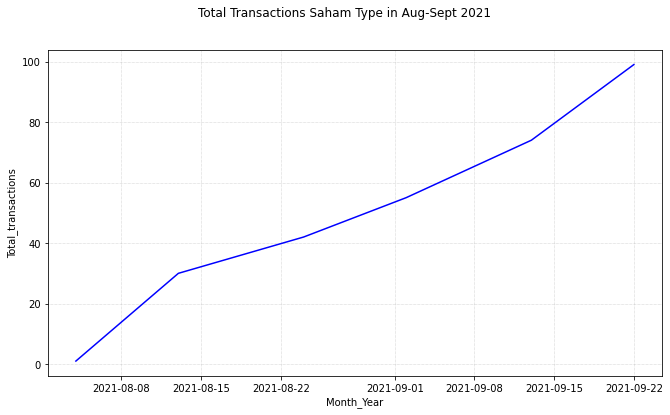

In [ ]:
#set the canvas size
fig = plt.figure(figsize=(11,6))

fig.suptitle("Total Transactions Saham Type in Aug-Sept 2021") #set title of chart plot in canvas
plt.xlabel("Month_Year") # set label name in x-axis
plt.ylabel("Total_transactions")# set label name in y-axis

x = EDA_1["Month-Year"][::7]
y = EDA_1["Saham_transaction_amount"][::7]
plt.plot(x,y, color='blue')
plt.grid(color = 'darkgray', linewidth= '0.5', linestyle= ':')
plt.show()

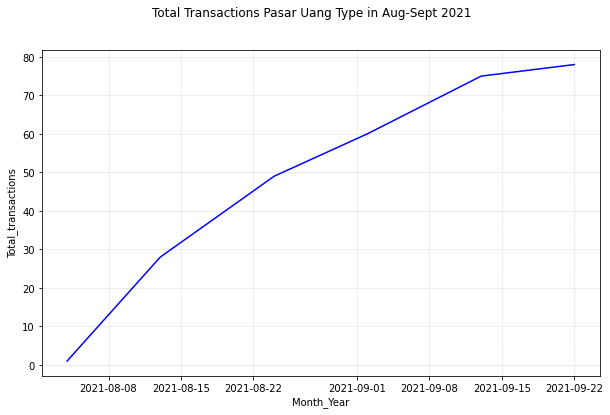

In [ ]:
#to set the canvas size
fig = plt.figure(figsize=(10,6))

fig.suptitle("Total Transactions Pasar Uang Type in Aug-Sept 2021") #set title of chart plot in canvas
plt.xlabel("Month_Year") # set label name in x-axis
plt.ylabel("Total_transactions")# set label name in y-axis

x = EDA_1["Month-Year"][::7]
y = EDA_1["Pasar_Uang_transaction_amount"][::7]
plt.plot(x,y, color='blue')
plt.grid(color = 'darkgray', linewidth= '0.5', linestyle= ':')
plt.show()

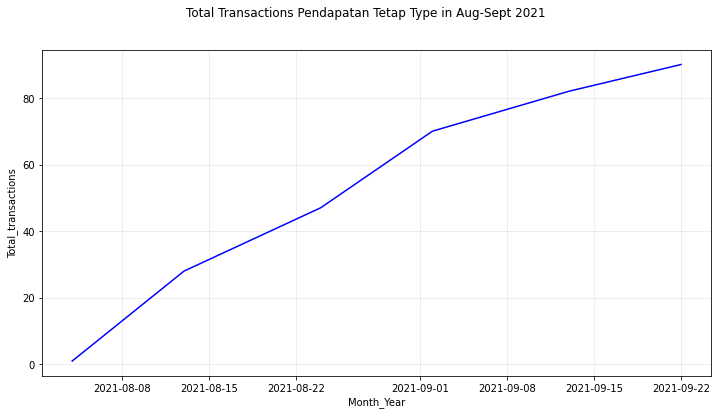

In [ ]:
#to set the canvas size
fig = plt.figure(figsize=(12,6))

fig.suptitle("Total Transactions Pendapatan Tetap Type in Aug-Sept 2021") #set title of chart plot in canvas
plt.xlabel("Month_Year") # set label name in x-axis
plt.ylabel("Total_transactions")# set label name in y-axis

x = EDA_1["Month-Year"][::7]
y = EDA_1["Pendapatan_Tetap_transaction_amount"][::7]
plt.plot(x,y, color='blue')
plt.grid(color = 'darkgray', linewidth= '0.5', linestyle= ':')
plt.show()

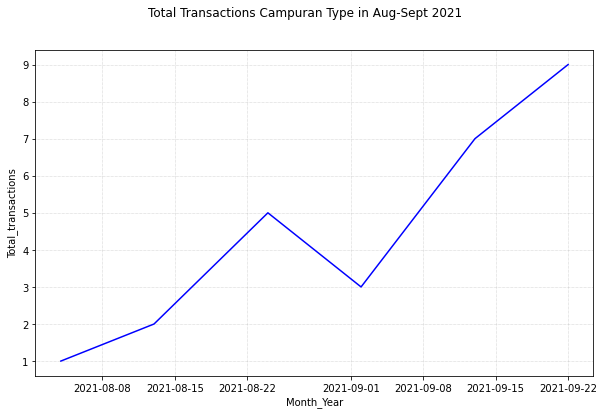

In [ ]:
#to set the canvas size
fig = plt.figure(figsize=(10,6))

fig.suptitle("Total Transactions Campuran Type in Aug-Sept 2021") #set title of chart plot in canvas
plt.xlabel("Month_Year") # set label name in x-axis
plt.ylabel("Total_transactions")# set label name in y-axis

x = EDA_1["Month-Year"][::7]
y = EDA_1["Campuran_transaction_amount"][::7]
plt.plot(x,y, color='blue')
plt.grid(color = 'darkgray', linewidth= '0.5', linestyle= ':')
plt.show()

####2. Percentage users based on gender

In [ ]:
df.head()

,user_id,registration_datetime,Gender,Age,Occupation,Income_Range,referral_code,Income_Source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,no used referral,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,no used referral,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,no used referral,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji


In [ ]:
EDA_2 = df.groupby("Gender")["user_id"].agg("nunique").reset_index()
EDA_2.columns = ["Gender","Num_Users"]
EDA_2

,Gender,Num_Users
0,Female,5735
1,Male,8977


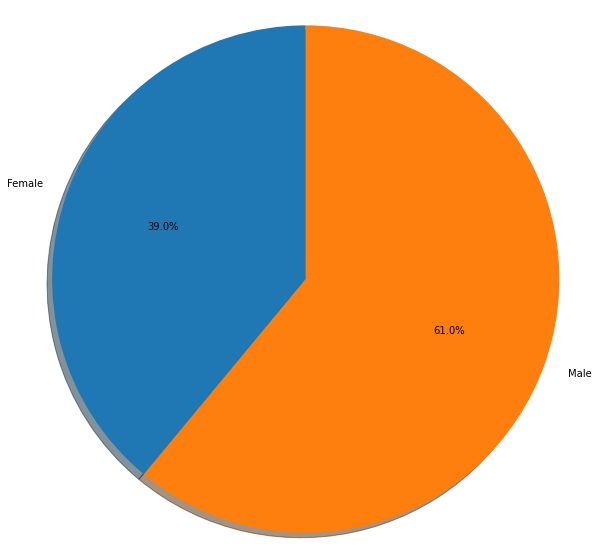

In [ ]:
plt.figure(figsize=(10,10))

data = EDA_2["Num_Users"]
labels = EDA_2["Gender"]

plt.pie(data,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

##User based on Occupation

In [ ]:
EDA_2 = df.groupby("Occupation")["user_id"].agg("nunique").reset_index()
EDA_2.columns = ["Occupation","Num_Users"]
EDA_2

,Occupation,Num_Users
0,Guru,106
1,IRT,934
2,Others,1683
3,PNS,191
4,Pelajar,7887
5,Pengusaha,598
6,Pensiunan,5
7,Swasta,3263
8,TNI/Polisi,45


<Axes: xlabel='count', ylabel='Occupation'>

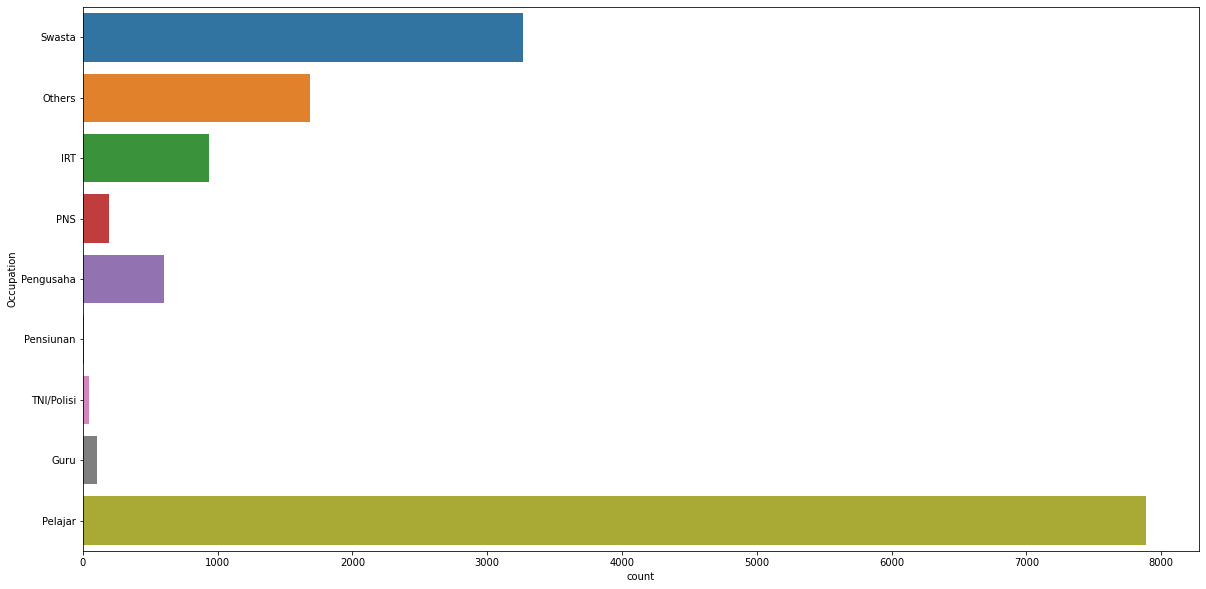

In [ ]:
#Visualize users based on occupation
plt.figure(figsize=(20,10))
sns.countplot(data=df, y="Occupation")

Based on visualization above, we can conclude that most of the users are students (7887) and the least occupation of users is retired (5)

##Users based on Age

In [ ]:
EDA_3 = df.groupby("Age")["user_id"].agg("nunique").reset_index()
EDA_3.columns = ["Age","Total"]
EDA_3

,Age,Total
0,17,268
1,18,771
2,19,972
3,20,1058
4,21,1192
5,22,963
6,23,1031
7,24,901
8,25,792
9,26,744


<Axes: xlabel='Age', ylabel='Total'>

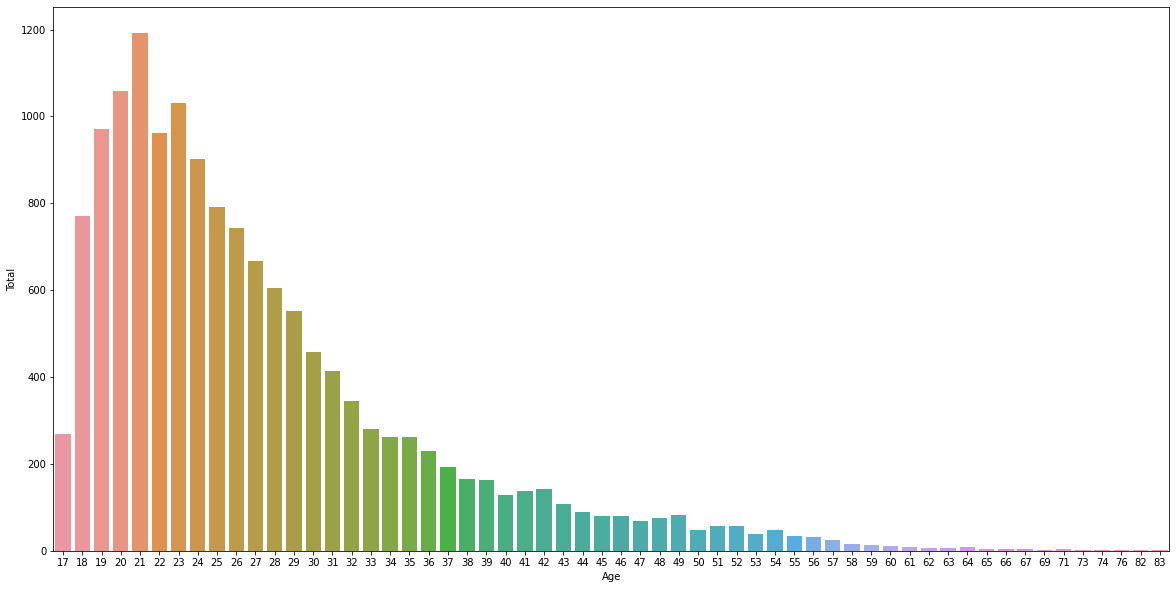

In [ ]:
#Visualize users based on age
plt.figure(figsize=(20,10))

sns.barplot(data=EDA_3, x="Age", y="Total")

As the distribution of user's age is shown above, we can see that users who invest in mutual fund products are dominated by young people around 19-24 years old

##Users based on Income Source

In [ ]:
EDA_4 = df.groupby("Income_Source")["user_id"].agg("nunique").reset_index()
EDA_4.columns = ["Income_Source","Total"]
EDA_4

,Income_Source,Total
0,Bunga Simpanan,24
1,Dari Orang Tua / Anak,1307
2,Dari Suami / istri,300
3,Gaji,9131
4,Hasil Investasi,165
5,Keuntungan Bisnis,1908
6,Lainnya,414
7,Tabungan,419
8,Undian,1001
9,Warisan,43


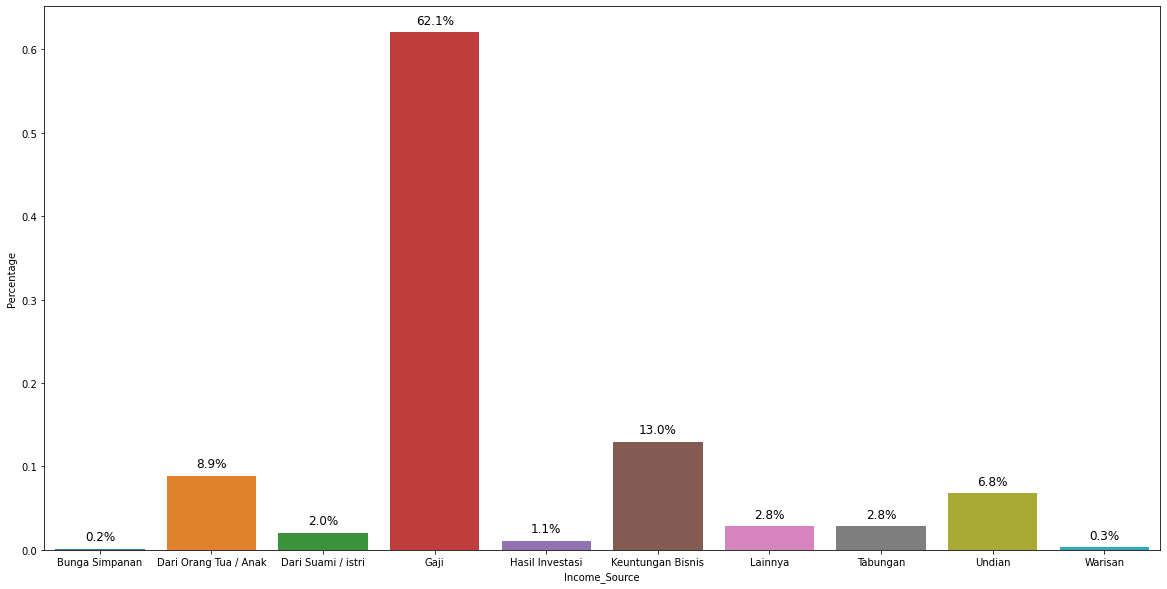

In [ ]:
#Visualize users based on income source
plt.figure(figsize=(20,10))

# Calculate percentage of unique users
EDA_4['Percentage'] = EDA_4['Total'] / EDA_4['Total'].sum()

# Create barplot
ax = sns.barplot(x='Income_Source', y='Percentage', data=EDA_4)

# Add percentage labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01, '{:.1%}'.format(height),
            ha="center", fontsize=12)

## Income Range of Users Mutual Fund

In [ ]:
EDA_5 = df.groupby("Income_Range")["user_id"].agg("nunique").reset_index()
EDA_5.columns = ["Income_Range","Total"]
EDA_5

,Income_Range,Total
0,< 10 Juta,6275
1,> Rp 1 Miliar,27
2,> Rp 100 Juta - 500 Juta,1114
3,> Rp 50 Juta - 100 Juta,2390
4,> Rp 500 Juta - 1 Miliar,90
5,Rp 10 Juta - 50 Juta,4816


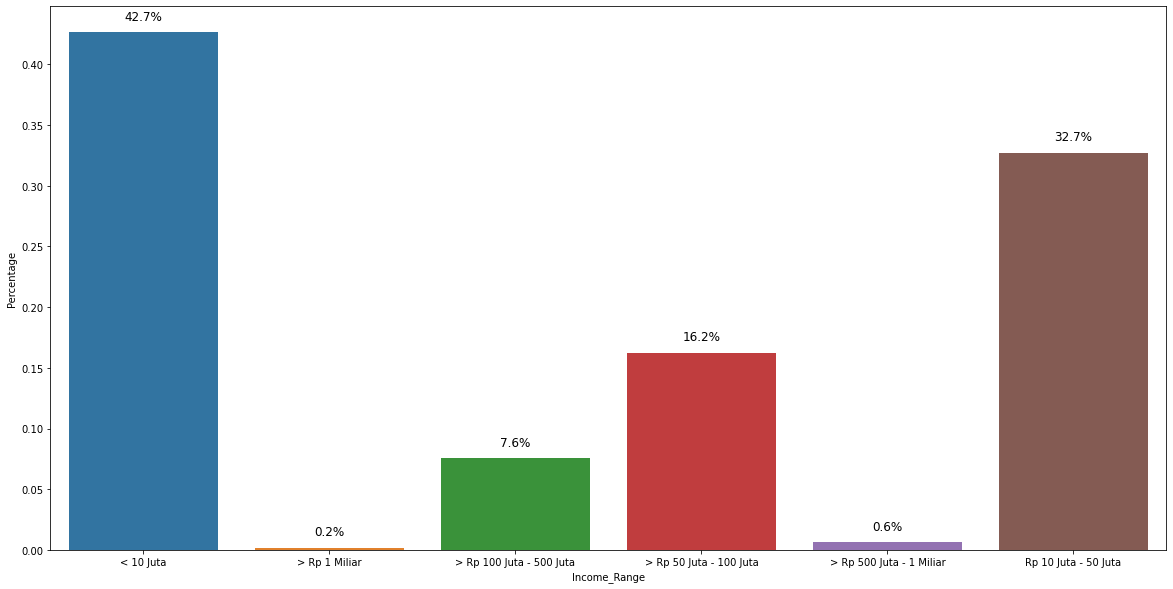

In [ ]:
#Visualize users based on income source
plt.figure(figsize=(20,10))

# Calculate percentage of unique users
EDA_5['Percentage'] = EDA_5['Total'] / EDA_5['Total'].sum()

# Create barplot
ax = sns.barplot(x='Income_Range', y='Percentage', data=EDA_5)

# Add percentage labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01, '{:.1%}'.format(height),
            ha="center", fontsize=12)

## Refferal Code Used

In [ ]:
df

,user_id,registration_datetime,Gender,Age,Occupation,Income_Range,referral_code,Income_Source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,no used referral,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,no used referral,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,no used referral,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,> Rp 100 Juta - 500 Juta,no used referral,Gaji
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,no used referral,Lainnya
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,> Rp 100 Juta - 500 Juta,no used referral,Dari Suami / istri
14710,4396739,2021-10-21 13:42:20,Male,49,Swasta,> Rp 100 Juta - 500 Juta,no used referral,Gaji


In [ ]:
EDA_6 = df.groupby("referral_code")["user_id"].agg("nunique").reset_index()
EDA_6.columns = ["referral_code","Total"]
EDA_6

,referral_code,Total
0,no used referral,9108
1,used referral,5604


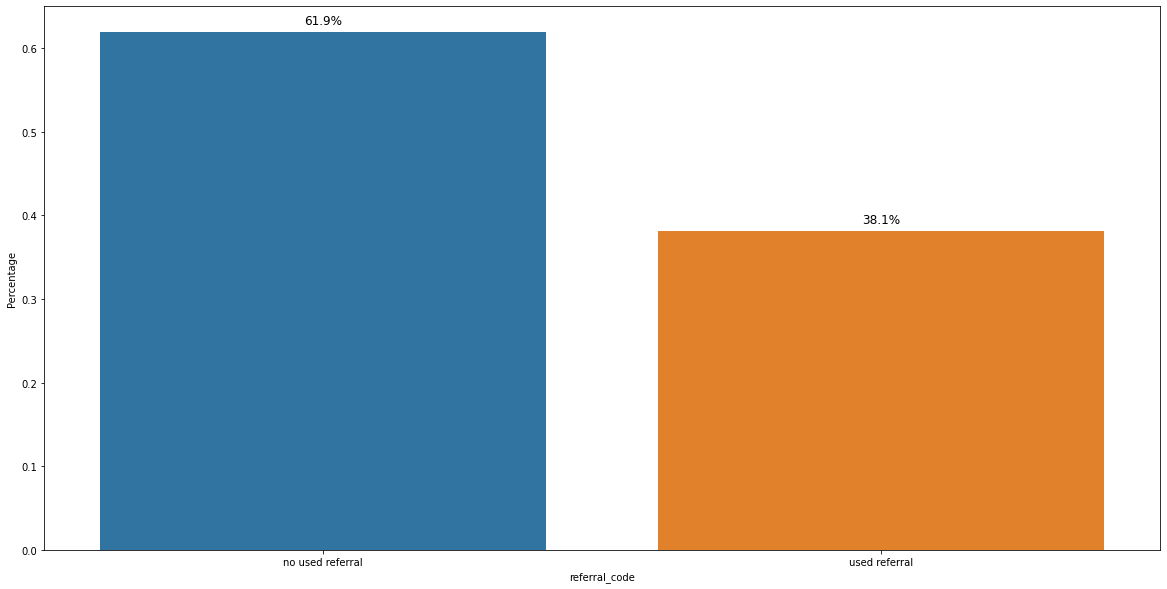

In [ ]:
#Visualize users based on income source
plt.figure(figsize=(20,10))

# Calculate percentage of unique users
EDA_6['Percentage'] = EDA_6['Total'] / EDA_6['Total'].sum()

# Create barplot
ax = sns.barplot(x='referral_code', y='Percentage', data=EDA_6)

# Add percentage labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01, '{:.1%}'.format(height),
            ha="center", fontsize=12)

#Cluster Analysis

In [ ]:
# Import scaler method and cluster libraries
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn import cluster
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17502 entries, 0 to 17501
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  17502 non-null  object        
 1   registration_datetime    17502 non-null  datetime64[ns]
 2   Gender                   17502 non-null  object        
 3   Age                      17502 non-null  int64         
 4   Occupation               17502 non-null  object        
 5   Income_Range             17502 non-null  object        
 6   referral_code            17502 non-null  object        
 7   Income_Source            17502 non-null  object        
 8   date                     17502 non-null  object        
 9   Equity_Total_Sell        17502 non-null  float64       
 10  Equity_Total_Buy         17502 non-null  float64       
 11  Equity_Total_Net         17502 non-null  float64       
 12  Equity_Total_Freq        17502 n

To make a cluster analysis, we need to filter columns we will used and change categorical column to number which Gender and referral_code column will be using label encoding and for Occupation,Income_Range, Income_Source will be using one-hot-encoding

In [ ]:
df_combine.head()

,user_id,registration_datetime,Gender,Age,Occupation,Income_Range,referral_code,Income_Source,date,Equity_Total_Sell,...,EOP_Money_Market_AUM,EOP_Money_Market_Amount,EOP_Fixed_Income_AUM,EOP_Fixed_Income_Amount,EOP_Mixed_AUM,EOP_Mixed_Amount,Profit_Equity,Profit_Money_Market,Profit_Fixed_Income,Profit_Mixed
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-08,0,...,"40,090","40,000","271,881","270,000",0,0,"-3,929",90,"1,881",0
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-08,0,...,"40,235","40,000","270,673","270,000",0,0,"7,141",235,673,0
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-09,0,...,"40,090","40,000","271,881","270,000",0,0,"-3,929",90,"1,881",0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-09,0,...,"40,235","40,000","270,673","270,000",0,0,"7,141",235,673,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,2021-08,0,...,"500,969","500,000","1,207,984","1,200,000",0,0,"-53,016",969,"7,984",0


In [ ]:
#Apply label encode gender and refferal code used
df_combine['Gender'] = df_combine['Gender'].astype('category')
df_combine['Gender_Label'] = df_combine['Gender'].cat.codes

df_combine['referral_code'] = df_combine['referral_code'].astype('category')
df_combine['Referral_code'] = df_combine['referral_code'].cat.codes
df_combine

,user_id,registration_datetime,Gender,Age,Occupation,Income_Range,referral_code,Income_Source,date,Equity_Total_Sell,...,EOP_Fixed_Income_AUM,EOP_Fixed_Income_Amount,EOP_Mixed_AUM,EOP_Mixed_Amount,Profit_Equity,Profit_Money_Market,Profit_Fixed_Income,Profit_Mixed,Gender_Label,Referral_code
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-08,0,...,"271,881","270,000",0,0,"-3,929",90,"1,881",0,0,0
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-08,0,...,"270,673","270,000",0,0,"7,141",235,673,0,0,0
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-09,0,...,"271,881","270,000",0,0,"-3,929",90,"1,881",0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-09,0,...,"270,673","270,000",0,0,"7,141",235,673,0,0,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,2021-08,0,...,"1,207,984","1,200,000",0,0,"-53,016",969,"7,984",0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17497,3812221,2021-08-11 17:33:05,Male,49,PNS,> Rp 100 Juta - 500 Juta,no used referral,Gaji,2021-08,0,...,0,0,0,0,0,0,0,0,1,0
17498,3812221,2021-08-11 17:33:05,Male,49,PNS,> Rp 100 Juta - 500 Juta,no used referral,Gaji,2021-08,0,...,0,0,0,0,0,0,0,0,1,0
17499,3812221,2021-08-11 17:33:05,Male,49,PNS,> Rp 100 Juta - 500 Juta,no used referral,Gaji,2021-09,0,...,0,0,0,0,0,0,0,0,1,0
17500,3812221,2021-08-11 17:33:05,Male,49,PNS,> Rp 100 Juta - 500 Juta,no used referral,Gaji,2021-09,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#apply one hot encoding on specific columns
list_one_hot = ["Occupation","Income_Range","Income_Source"]
dum_df = pd.get_dummies(df_combine, columns=["Occupation","Income_Range","Income_Source"], prefix=list_one_hot)
df_combine = df_combine.merge(dum_df)
df_combine

,user_id,registration_datetime,Gender,Age,Occupation,Income_Range,referral_code,Income_Source,date,Equity_Total_Sell,...,Income_Source_Bunga Simpanan,Income_Source_Dari Orang Tua / Anak,Income_Source_Dari Suami / istri,Income_Source_Gaji,Income_Source_Hasil Investasi,Income_Source_Keuntungan Bisnis,Income_Source_Lainnya,Income_Source_Tabungan,Income_Source_Undian,Income_Source_Warisan
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-08,0,...,0,0,0,1,0,0,0,0,0,0
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-08,0,...,0,0,0,1,0,0,0,0,0,0
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-09,0,...,0,0,0,1,0,0,0,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-09,0,...,0,0,0,1,0,0,0,0,0,0
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,2021-08,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17497,3812221,2021-08-11 17:33:05,Male,49,PNS,> Rp 100 Juta - 500 Juta,no used referral,Gaji,2021-08,0,...,0,0,0,1,0,0,0,0,0,0
17498,3812221,2021-08-11 17:33:05,Male,49,PNS,> Rp 100 Juta - 500 Juta,no used referral,Gaji,2021-08,0,...,0,0,0,1,0,0,0,0,0,0
17499,3812221,2021-08-11 17:33:05,Male,49,PNS,> Rp 100 Juta - 500 Juta,no used referral,Gaji,2021-09,0,...,0,0,0,1,0,0,0,0,0,0
17500,3812221,2021-08-11 17:33:05,Male,49,PNS,> Rp 100 Juta - 500 Juta,no used referral,Gaji,2021-09,0,...,0,0,0,1,0,0,0,0,0,0


All the numeric columns have different scale so we need to scale the numeric columns. For information, the numeric columns still contained outliers in it so we will be using RobustScaler()

In [ ]:
df_combine.columns

Index(['user_id', 'registration_datetime', 'Gender', 'Age', 'Occupation',
       'Income_Range', 'referral_code', 'Income_Source', 'date',
       'Equity_Total_Sell', 'Equity_Total_Buy', 'Equity_Total_Net',
       'Equity_Total_Freq', 'Money_market_Total_Sell',
       'Money_market_Total_Buy', 'Money_market_Total_Net', 'Money_market_Freq',
       'Fixed_Income_Total_Sell', 'Fixed_Income_Total_Buy',
       'Fixed_Income_Total_Net', 'Fixed_Income_Freq', 'Mixed_Total_Sell',
       'Mixed_Total_Buy', 'Mixed_Total_Net', 'Mixed_Freq', 'Period',
       'EOP_Equity_AUM', 'EOP_Equity_Amount', 'EOP_Money_Market_AUM',
       'EOP_Money_Market_Amount', 'EOP_Fixed_Income_AUM',
       'EOP_Fixed_Income_Amount', 'EOP_Mixed_AUM', 'EOP_Mixed_Amount',
       'Profit_Equity', 'Profit_Money_Market', 'Profit_Fixed_Income',
       'Profit_Mixed', 'Gender_Label', 'Referral_code', 'Occupation_Guru',
       'Occupation_IRT', 'Occupation_Others', 'Occupation_PNS',
       'Occupation_Pelajar', 'Occupation_Pengus

In [ ]:
cols_num = ['Age','Equity_Total_Sell', 'Equity_Total_Buy', 'Equity_Total_Net',
       'Equity_Total_Freq', 'Money_market_Total_Sell',
       'Money_market_Total_Buy', 'Money_market_Total_Net', 'Money_market_Freq',
       'Fixed_Income_Total_Sell', 'Fixed_Income_Total_Buy',
       'Fixed_Income_Total_Net', 'Fixed_Income_Freq', 'Mixed_Total_Sell',
       'Mixed_Total_Buy', 'Mixed_Total_Net', 'Mixed_Freq', 'Period',
       'EOP_Equity_AUM', 'EOP_Equity_Amount', 'EOP_Money_Market_AUM',
       'EOP_Money_Market_Amount', 'EOP_Fixed_Income_AUM',
       'EOP_Fixed_Income_Amount', 'EOP_Mixed_AUM', 'EOP_Mixed_Amount',
       'Profit_Equity', 'Profit_Money_Market', 'Profit_Fixed_Income',
       'Profit_Mixed']
print(cols_num)

['Age', 'Equity_Total_Sell', 'Equity_Total_Buy', 'Equity_Total_Net', 'Equity_Total_Freq', 'Money_market_Total_Sell', 'Money_market_Total_Buy', 'Money_market_Total_Net', 'Money_market_Freq', 'Fixed_Income_Total_Sell', 'Fixed_Income_Total_Buy', 'Fixed_Income_Total_Net', 'Fixed_Income_Freq', 'Mixed_Total_Sell', 'Mixed_Total_Buy', 'Mixed_Total_Net', 'Mixed_Freq', 'Period', 'EOP_Equity_AUM', 'EOP_Equity_Amount', 'EOP_Money_Market_AUM', 'EOP_Money_Market_Amount', 'EOP_Fixed_Income_AUM', 'EOP_Fixed_Income_Amount', 'EOP_Mixed_AUM', 'EOP_Mixed_Amount', 'Profit_Equity', 'Profit_Money_Market', 'Profit_Fixed_Income', 'Profit_Mixed']


In [ ]:
df_combine[cols_num] = df_combine[cols_num].astype('int64')
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17502 entries, 0 to 17501
Data columns (total 65 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   user_id                                17502 non-null  object        
 1   registration_datetime                  17502 non-null  datetime64[ns]
 2   Gender                                 17502 non-null  category      
 3   Age                                    17502 non-null  int64         
 4   Occupation                             17502 non-null  object        
 5   Income_Range                           17502 non-null  object        
 6   referral_code                          17502 non-null  category      
 7   Income_Source                          17502 non-null  object        
 8   date                                   17502 non-null  object        
 9   Equity_Total_Sell                      17502 non-null  int64 

In [ ]:
#Another dataset that will fit to the cluster model
cluster_input = df_ori

#Add total freq, and total profit
cluster_input["total_profit_mf"] = cluster_input["Profit_Equity"] + cluster_input["Profit_Fixed_Income"] + cluster_input["Profit_Money_Market"] + cluster_input["Profit_Mixed"]
cluster_input["total_freq"] = cluster_input["Equity_Total_Freq"] + cluster_input["Fixed_Income_Freq"] + cluster_input["Money_market_Freq"] + cluster_input["Mixed_Freq"]

#Change total_profit type to int
cluster_input["total_profit_mf"] = cluster_input["total_profit_mf"].astype('int')

#Filter dataframe to get variables we needed
cluster_input_fix = cluster_input[["Age","total_profit_mf","total_freq"]]
cluster_input_fix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17502 entries, 0 to 17501
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              17502 non-null  int64
 1   total_profit_mf  17502 non-null  int64
 2   total_freq       17502 non-null  int64
dtypes: int64(3)
memory usage: 546.9 KB


In [ ]:
#Re-check the data after changing
cluster_input_fix.head()

,Age,total_profit_mf,total_freq
0,53,-1958,0
1,53,8049,0
2,53,-1958,0
3,53,8049,0
4,47,-44063,0


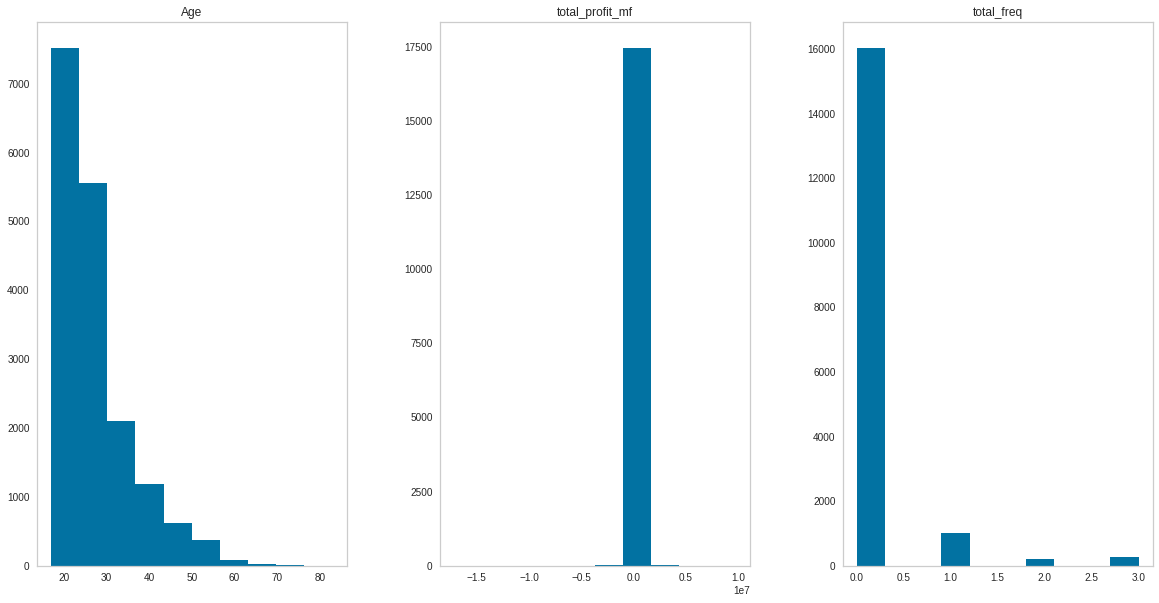

In [ ]:
numerical_column = ["Age","total_profit_mf","total_freq"]

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,10))
for i,el in enumerate(numerical_column):
    a = cluster_input_fix.hist(el, ax=axes.flatten()[i],grid=False)
plt.show()

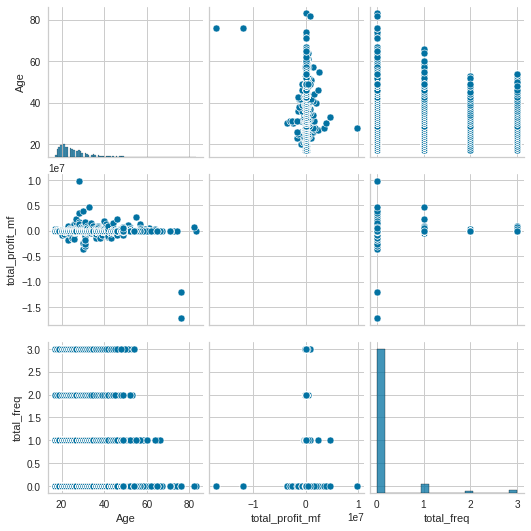

In [ ]:
sns.pairplot(data=cluster_input_fix)

##**Elbow Method**

###Scalling Method : Standard Scaler

In [ ]:
#Scalling numerical data with standard scaler
scaler = StandardScaler()
cluster_input_fix1 = scaler.fit_transform(cluster_input_fix)
cluster_input_fix1

array([[ 3.00250267, -0.02750556, -0.26646681],
       [ 3.00250267,  0.00774112, -0.26646681],
       [ 3.00250267, -0.02750556, -0.26646681],
       ...,
       [ 2.53717398, -0.02060909, -0.26646681],
       [ 2.53717398, -0.02060909, -0.26646681],
       [ 2.53717398,  1.90612742, -0.26646681]])

In [ ]:
#Check numerical data that have been scalled
#df_combine[cols_num]

In [ ]:
#Create another df to fit in with the model
#df_cluster = df_combine[['Age','Equity_Total_Net','Equity_Total_Freq', 'Money_market_Total_Net',
#                         'Money_market_Freq', 'Fixed_Income_Total_Net','Fixed_Income_Freq', 'Mixed_Total_Net',
#                        'Mixed_Freq','EOP_Equity_AUM', 'EOP_Money_Market_AUM', 'EOP_Fixed_Income_AUM','EOP_Mixed_AUM']]

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

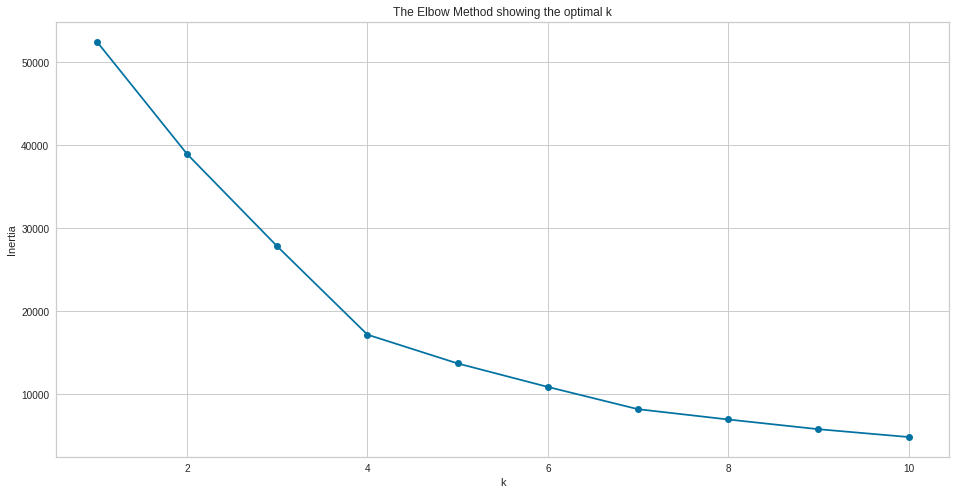

In [ ]:
#Elbow method to check optimal n cluster
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(cluster_input_fix1)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Insight : After the scalling method and fit with the cluster model, we can conlude also from the graphic that 4 or 5 cluster could be an optimal cluster to be created

###Scalling Method : MinMax Scaler

In [ ]:
#Scalling numerical data with minmax scaler
scaler = MinMaxScaler()
cluster_input_fix2 = scaler.fit_transform(cluster_input_fix)
cluster_input_fix2

array([[0.54545455, 0.63779244, 0.        ],
       [0.54545455, 0.63816347, 0.        ],
       [0.54545455, 0.63779244, 0.        ],
       ...,
       [0.48484848, 0.63786504, 0.        ],
       [0.48484848, 0.63786504, 0.        ],
       [0.48484848, 0.65814743, 0.        ]])

In [ ]:
#df_cluster1 = df_combine[['Age','Equity_Total_Net','Equity_Total_Freq', 'Money_market_Total_Net',
#                         'Money_market_Freq', 'Fixed_Income_Total_Net','Fixed_Income_Freq', 'Mixed_Total_Net',
#                         'Mixed_Freq','EOP_Equity_AUM', 'EOP_Money_Market_AUM', 'EOP_Fixed_Income_AUM','EOP_Mixed_AUM']]

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

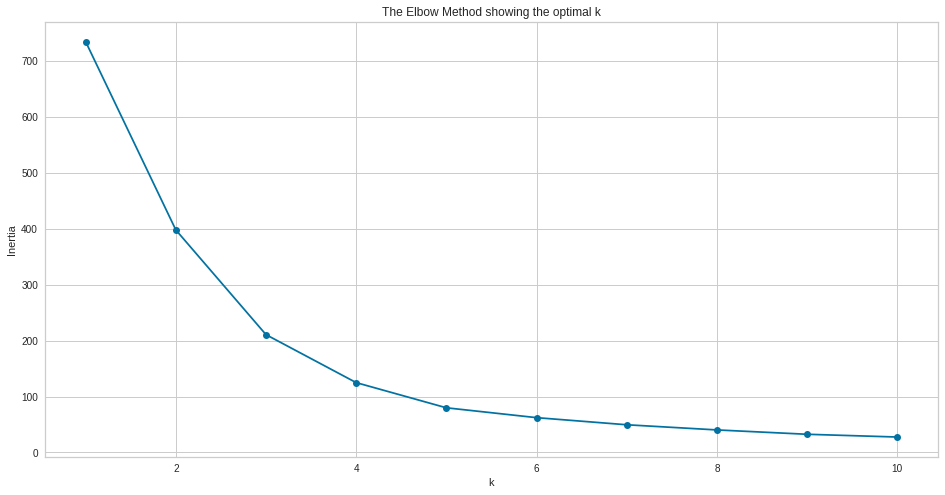

In [ ]:
#Elbow method to check optimal n cluster
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(cluster_input_fix2)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Insight : Data that have been scalling with Minmax Scaller and been visualized with elbow method shows that 4 or 5 are the optimal n cluster

###Scalling Method : Robust Scaler

In [ ]:
#Scalling numerical data with robust scaler
scaler = RobustScaler()
cluster_input_fix3 = scaler.fit_transform(cluster_input_fix)
cluster_input_fix3

array([[  2.8       ,  -0.72866894,   0.        ],
       [  2.8       ,   2.11746303,   0.        ],
       [  2.8       ,  -0.72866894,   0.        ],
       ...,
       [  2.4       ,  -0.17178612,   0.        ],
       [  2.4       ,  -0.17178612,   0.        ],
       [  2.4       , 155.41012514,   0.        ]])

In [ ]:
#df_cluster2 = df_combine[['Age','Equity_Total_Net','Equity_Total_Freq', 'Money_market_Total_Net',
#                         'Money_market_Freq', 'Fixed_Income_Total_Net','Fixed_Income_Freq', 'Mixed_Total_Net',
#                        'Mixed_Freq','EOP_Equity_AUM', 'EOP_Money_Market_AUM', 'EOP_Fixed_Income_AUM','EOP_Mixed_AUM']]#

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

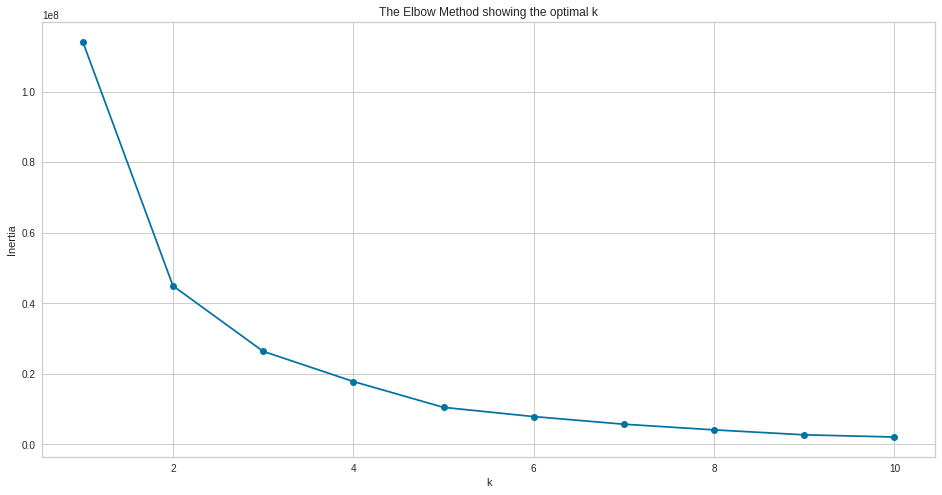

In [ ]:
#Elbow method to check optimal n cluster
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(cluster_input_fix3)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Insight : Data that have been scalling with Robust Scaller and been visualized with elbow method shows simmilar result with MinMax Scaller (n optimal = 4 or 5).

##**Silhouette Analysis**

###Scalling Method : Standard Scaller

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=2, the average silhouette score is 0.6607583588487743


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=3, the average silhouette score is 0.6353228197452854


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=4, the average silhouette score is 0.6296956570353993


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=5, the average silhouette score is 0.6426772632841123


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=6, the average silhouette score is 0.6434783285065704


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=7, the average silhouette score is 0.5665585809257354


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=8, the average silhouette score is 0.5837830384142867


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=9, the average silhouette score is 0.5854388682272724


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=10, the average silhouette score is 0.5500894066253392


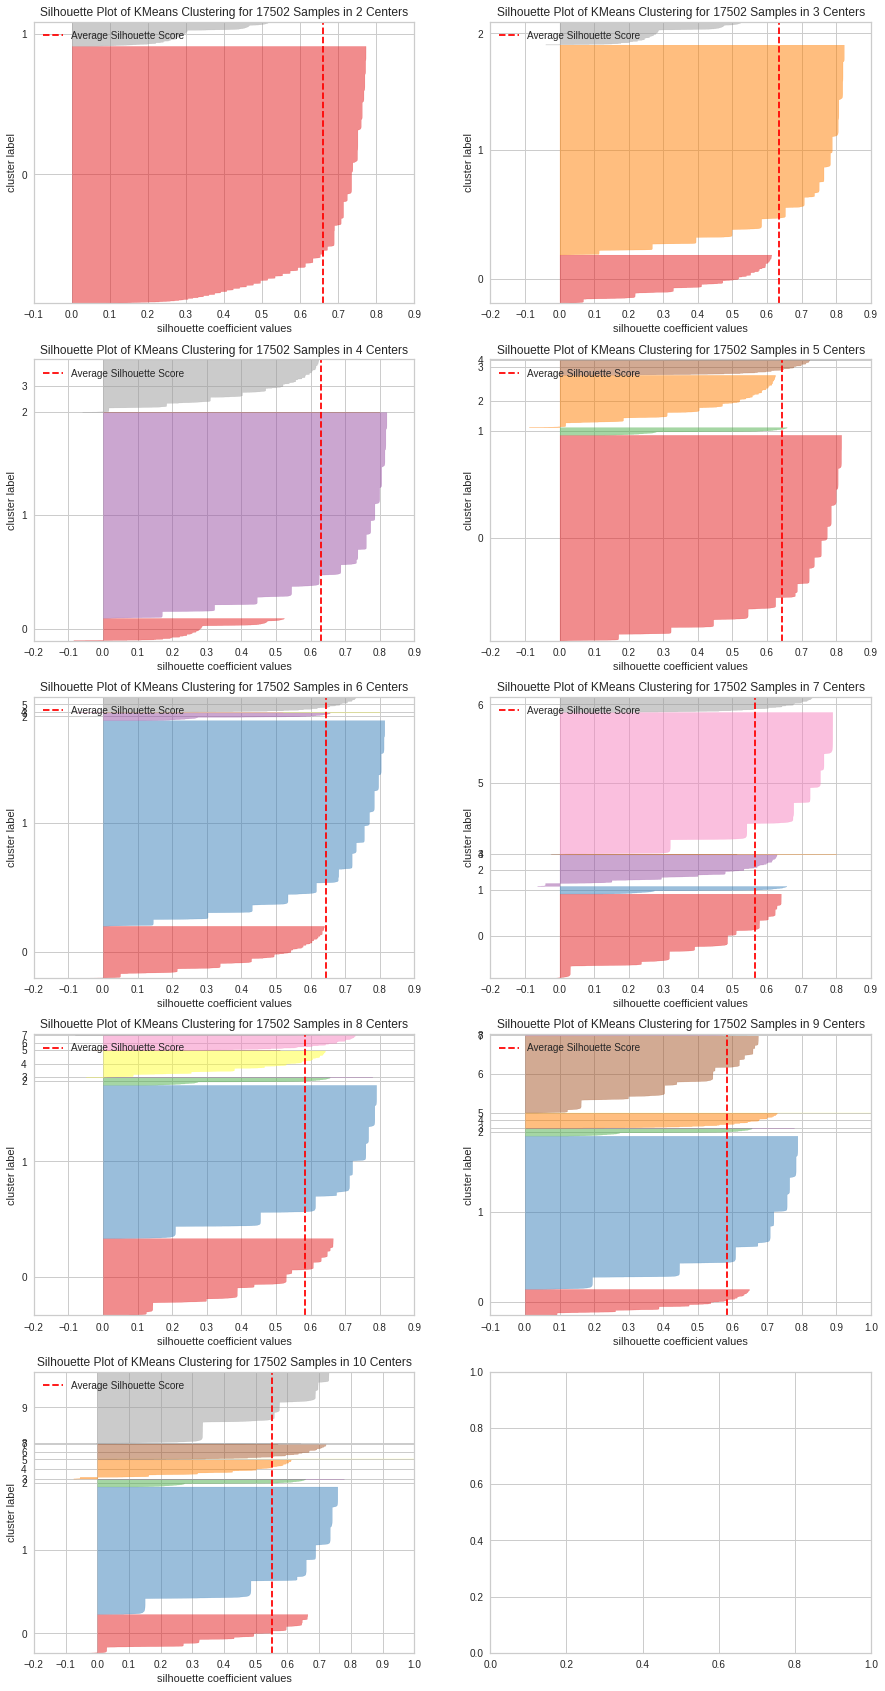

In [ ]:
# Silhouette score plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = cluster.KMeans(n_clusters)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(cluster_input_fix1)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

###Scalling Method : MinMax Scaller

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=2, the average silhouette score is 0.7182782094917746


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=3, the average silhouette score is 0.6479176555366148


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=4, the average silhouette score is 0.6692513153168985


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=5, the average silhouette score is 0.6034633826003657


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=6, the average silhouette score is 0.5866992115985019


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=7, the average silhouette score is 0.5922413054498583


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=8, the average silhouette score is 0.5783080014538144


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=9, the average silhouette score is 0.5713028284375418


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=10, the average silhouette score is 0.5665644681031783


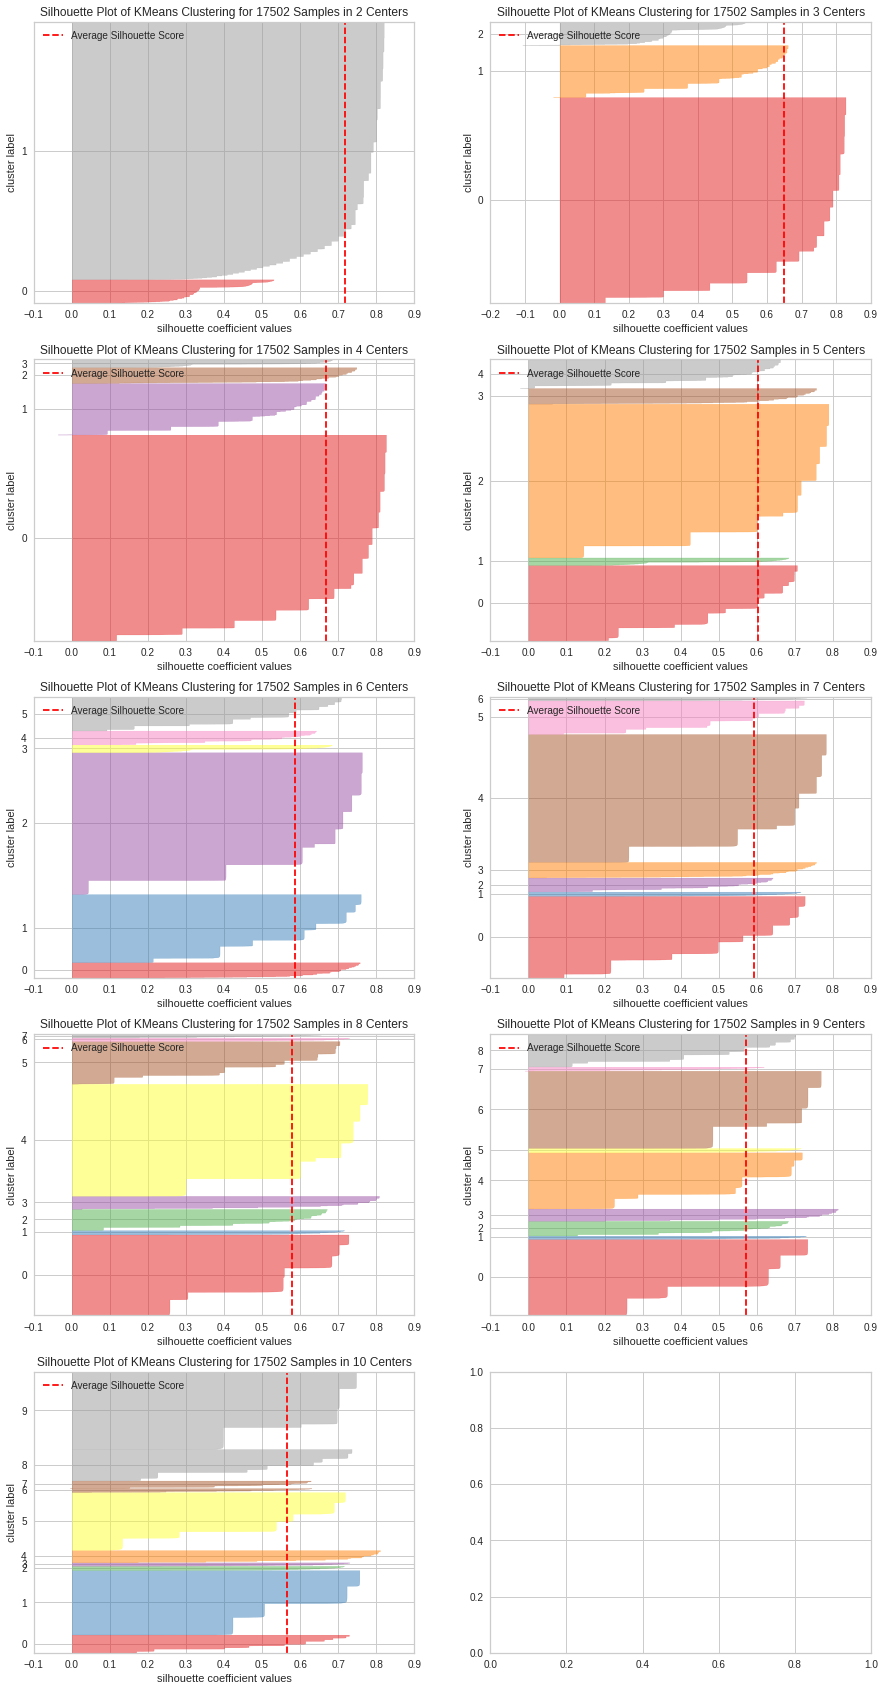

In [ ]:
# Silhouette score plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = cluster.KMeans(n_clusters)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(cluster_input_fix2)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

###Scalling Method : Robust Scaller

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=2, the average silhouette score is 0.9972041122392983


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=3, the average silhouette score is 0.9915248408779498


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=4, the average silhouette score is 0.9827484139872424


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=5, the average silhouette score is 0.9832387619606149


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=6, the average silhouette score is 0.9657019673064031


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=7, the average silhouette score is 0.9657654299958233


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=8, the average silhouette score is 0.9529907085434467


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=9, the average silhouette score is 0.9540558589038726


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=10, the average silhouette score is 0.955199556819355


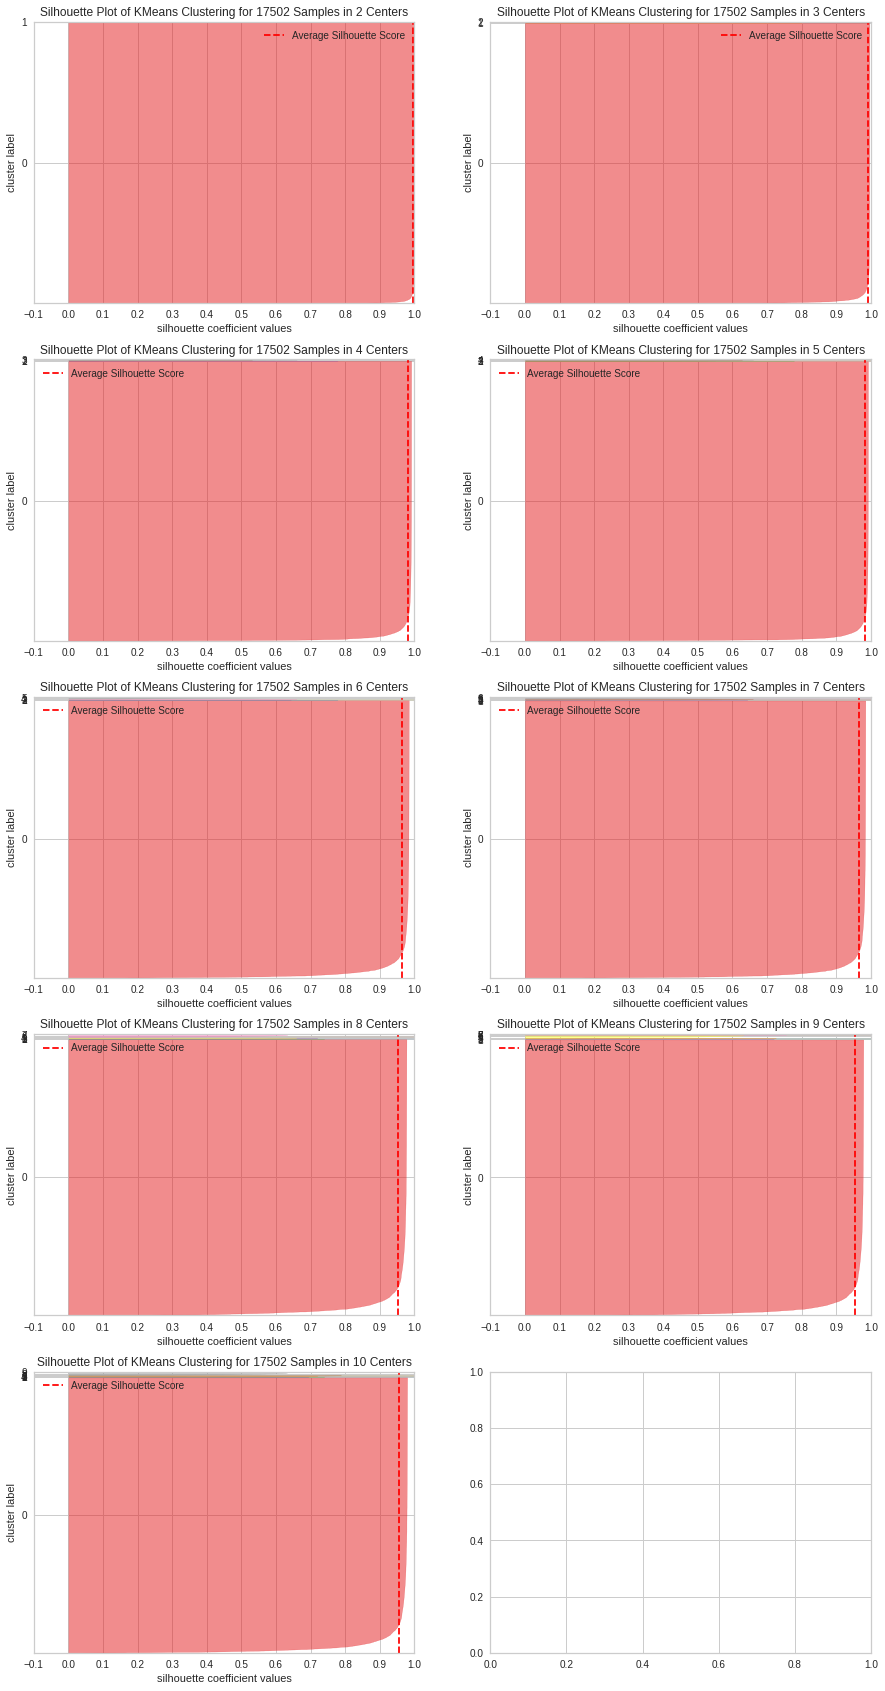

In [ ]:
# Silhouette score plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = cluster.KMeans(n_clusters)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(cluster_input_fix3)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

Insight : Based on Silhouette Analysis and Elbow Method have been tried before we can conclude that optimal number of cluster are 5 clusters

#Interpreting the Cluster

Before doing interpreting cluster we need to add cluster result to the origin dataset  first so we can analyze the characteristics of users in each clusters

In [ ]:
cluster_model = cluster.KMeans(n_clusters=5)
cluster_model.fit(cluster_input_fix2)
cluster_label = cluster_model.labels_

df_result = df_ori.copy()
df_result['cluster'] = cluster_label
pd.set_option('display.max_columns', None)
df_result.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,user_id,registration_datetime,Gender,Age,Occupation,Income_Range,referral_code,Income_Source,date,Equity_Total_Sell,Equity_Total_Buy,Equity_Total_Net,Equity_Total_Freq,Money_market_Total_Sell,Money_market_Total_Buy,Money_market_Total_Net,Money_market_Freq,Fixed_Income_Total_Sell,Fixed_Income_Total_Buy,Fixed_Income_Total_Net,Fixed_Income_Freq,Mixed_Total_Sell,Mixed_Total_Buy,Mixed_Total_Net,Mixed_Freq,Period,EOP_Equity_AUM,EOP_Equity_Amount,EOP_Money_Market_AUM,EOP_Money_Market_Amount,EOP_Fixed_Income_AUM,EOP_Fixed_Income_Amount,EOP_Mixed_AUM,EOP_Mixed_Amount,Profit_Equity,Profit_Money_Market,Profit_Fixed_Income,Profit_Mixed,total_profit_mf,total_freq,cluster
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021-08-31,"186,071","190,000","40,090","40,000","271,881","270,000",0,0,"-3,929",90,"1,881",0,-1958,0,1
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021-09-30,"297,141","290,000","40,235","40,000","270,673","270,000",0,0,"7,141",235,673,0,8049,0,1
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021-08-31,"186,071","190,000","40,090","40,000","271,881","270,000",0,0,"-3,929",90,"1,881",0,-1958,0,1
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,no used referral,Gaji,2021-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021-09-30,"297,141","290,000","40,235","40,000","270,673","270,000",0,0,"7,141",235,673,0,8049,0,1
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji,2021-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021-08-31,"3,246,984","3,300,000","500,969","500,000","1,207,984","1,200,000",0,0,"-53,016",969,"7,984",0,-44063,0,1


In [ ]:
#Show result number of users in each cluster
df_result["cluster"].value_counts()

0    8853
3    5440
1    1784
4     955
2     470
Name: cluster, dtype: int64

In [ ]:
# Let's re-look into data after clustering
df_result.groupby('cluster').agg(['mean','count','max','min'])[["Age","total_freq","total_profit_mf"]]

<ipython-input-154-c5416e9da054>:2: FutureWarning: ['Gender', 'Occupation', 'Income_Range', 'referral_code', 'Income_Source', 'date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_result.groupby('cluster').agg(['mean','count','max','min'])[["Age","total_freq","total_profit_mf"]]


Age               total_freq               total_profit_mf        \
        mean count max min       mean count max min            mean count   
cluster                                                                     
0         21  8853  25  17          0  8853   0   0           2,296  8853   
1         47  1784  83  39          0  1784   1   0         -13,592  1784   
2         29   470  54  17          3   470   3   2          26,741   470   
3         30  5440  38  26          0  5440   0   0          13,145  5440   
4         26   955  47  17          1   955   1   1          23,306   955   

                            
             max       min  
cluster                     
0         937011  -1736133  
1        2628315 -17203530  
2         855666   -125309  
3        9766956  -3634241  
4        4733842   -352688



1. Cluster 0 =
              - Age (Mean) = 21
              - total freq = 0
              - total profit_mf = 2.296
2. Cluster 1 =
              - Age (Mean) = 47
              - total freq = 0
              - total profit_mf = -13.592
3. Cluster 2 =
               - Age (Mean) = 29
               - total freq = 3
               - total profit_mf = 26.741
4. Cluster 3 =
               - Age (Mean) = 30
               - total freq = 0
               - total profit_mf = 13.145
5. Cluster 4 =
               - Age (Mean) = 26
               - total freq = 1
               - total profit_mf = 23.306

<Axes: xlabel='total_freq', ylabel='Age'>

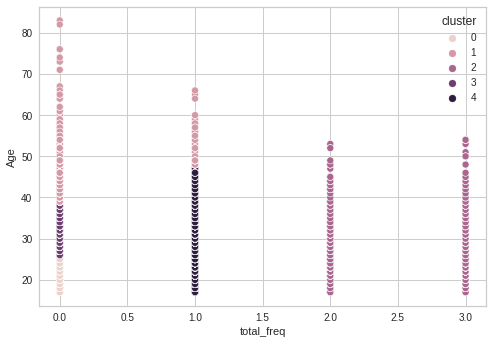

In [ ]:
sns.scatterplot(x ='total_freq', y ='Age' , data=df_result, hue='cluster')

<Axes: xlabel='Age', ylabel='total_profit_mf'>

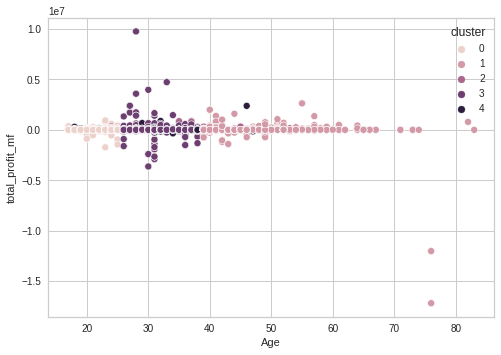

In [ ]:
sns.scatterplot(x = 'Age', y = 'total_profit_mf', data=df_result, hue='cluster')

In [ ]:
df_result.groupby(['cluster'])["Occupation"].value_counts()

cluster  Occupation
0        Pelajar       7514
         Others         693
         Swasta         397
         IRT            136
         Pengusaha       77
         TNI/Polisi      15
         PNS             12
         Guru             9
1        Swasta         918
         IRT            334
         Others         175
         Pengusaha      155
         PNS            133
         Guru            34
         TNI/Polisi      20
         Pensiunan       10
         Pelajar          5
2        Pelajar        216
         Swasta         154
         Others          51
         IRT             18
         Pengusaha       18
         PNS             12
         Guru             1
3        Swasta        2275
         Pelajar       1527
         Others         726
         IRT            379
         Pengusaha      331
         PNS            116
         Guru            62
         TNI/Polisi      24
4        Pelajar        539
         Swasta         209
         Others         105


In [ ]:
cluster_job = df_result.groupby(['cluster','Occupation']).size().agg("count")
cluster_job

40

In [ ]:
clusters = df_result['cluster'].unique()

for cluster in clusters:
    data = df_result[df_result['cluster'] == cluster]
    x = data['Occupation']
    y = data['count']

    fig, ax = plt.subplots()
    ax.bar(x, y)
    ax.set_title(f'Cluster {cluster} Occupations')
    ax.set_xlabel('Occupation')
    ax.set_ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()


KeyError: ignored

In [ ]:
df_result.groupby(['cluster'])["Gender","referral_code","Occupation"].describe()

<ipython-input-152-360a98607b75>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_result.groupby(['cluster'])["Gender","referral_code","Occupation"].describe()


Gender                    referral_code                           \
         count unique   top  freq         count unique               top   
cluster                                                                    
0         8853      2  Male  5470          8853      2  no used referral   
1         1784      2  Male  1029          1784      2  no used referral   
2          470      2  Male   283           470      2  no used referral   
3         5440      2  Male  3358          5440      2  no used referral   
4          955      2  Male   544           955      2  no used referral   

              Occupation                        
         freq      count unique      top  freq  
cluster                                         
0        5927       8853      8  Pelajar  7514  
1        1260       1784      9   Swasta   918  
2         348        470      7  Pelajar   216  
3        3753       5440      8   Swasta  2275  
4         631        955      8  Pelajar   539

In [ ]:
df_result["total_profit_mf"].mean()

5851.192492286596

In [ ]:
result_rf = df_result.groupby("cluster")["referral_code"].value_counts()
result_rf

cluster  referral_code   
0        no used referral    5927
         used referral       2926
1        no used referral    1260
         used referral        524
2        no used referral     348
         used referral        122
3        no used referral    3753
         used referral       1687
4        no used referral     631
         used referral        324
Name: referral_code, dtype: int64